<a href="https://colab.research.google.com/github/GleiconMaior/interactive_filtering/blob/main/An%C3%A1lise_de_velocidades_Anglo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primeiros scripts de teste

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import os
from matplotlib.image import imread

# Lendo o arquivo de telemetria
arquivo_telemetria = '/content/drive/MyDrive/ANGLO - DADOS/2022-02e03_modificado_V3.csv'
dados = pd.read_csv(arquivo_telemetria)

# Removendo as colunas que não têm muita função no código
dados = dados.drop(['ShiftId', 'Data', 'Dia', 'Mês', 'Ano', 'Timestamp', 'StartEmpty', 'EndEmpty', 'EndFull', 'PositionX', 'Speed', 'Decimais', '7'], axis=1)

# Adiciona uma coluna com a velocidade arredondada para o múltiplo de 10 mais próximo
dados['Speed_km_h_10'] = np.floor(dados['Speed_km_h'] / 10) * 10

# Carregando as imagens correspondentes a cada área
img_fase4 = imread('/content/drive/MyDrive/ANGLO - DADOS/FASE4_ANGLO.png')
img_britador = imread('/content/drive/MyDrive/ANGLO - DADOS/BRITADOR_ANGLO.png')
img_cascalheira = imread('/content/drive/MyDrive/ANGLO - DADOS/CASCALHEIRA_ANGLO.png')
img_borel = imread('/content/drive/MyDrive/ANGLO - DADOS/BOREL_ANGLO.png')
img_pde = imread('/content/drive/MyDrive/ANGLO - DADOS/PDE_ANGLO.png')
img_stepsul = imread('/content/drive/MyDrive/ANGLO - DADOS/STEPSUL_ANGLO.png')

# Definindo os limites de cada área
limites_areas = [
    ('FASE4', 664870, 665214, 7908550, 7909640, img_fase4),
    ('BRITADOR', 664957, 665774, 7909655, 7911199, img_britador),
    ('CASCALHEIRA', 665214, 666242, 7908957, 7909655, img_cascalheira),
    ('BOREL', 665728, 666741, 7906891, 7908957, img_borel),
    ('PDE', 666252, 667494, 7908966, 7910662, img_pde),
    ('STEPSUL', 665728, 668065, 7904231, 7906977, img_stepsul)
]

# Gerando as opções para o filtro interativo
opcoes = [
    ('EquipmentId', widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in dados['EquipmentId'].unique()}})),
    ('dif_speed_20p', widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in dados['Speed_km_h_10'].unique()}})),
    ('DataMin', widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in sorted(dados['Data_Ok'].unique(), key=lambda x: pd.to_datetime(x, format='%d/%m/%Y'))}})),
    ('DataMax', widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in sorted(dados['Data_Ok'].unique(), key=lambda x: pd.to_datetime(x, format='%d/%m/%Y'))}})),
    ('Shift', widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in dados['Shift'].unique()}})),
    ('Payload', widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in dados['Payload'].unique()}})),
    ('Coordenadas', widgets.Dropdown(options={'Todas': None, **{area: area for area, _, _, _, _, _ in limites_areas}})),
]

# Criando os widgets para o filtro interativo
filtro_widgets = {nome: widget for nome, widget in opcoes}

# Definindo a função de filtro interativo
def filtro_interativo(EquipmentId, dif_speed_20p, DataMin, DataMax, Shift, Payload, Coordenadas):
    dados_filtrados = dados.copy()
    if EquipmentId is not None:
        dados_filtrados = dados_filtrados[dados_filtrados['EquipmentId'] == EquipmentId]
    if dif_speed_20p is not None:
        dados_filtrados = dados_filtrados[dados_filtrados['Speed_km_h_10'] == dif_speed_20p]
    if DataMin != 'Todos' and DataMax != 'Todos':
        dados_filtrados = dados_filtrados[(dados_filtrados['Data_Ok'] >= DataMin) & (dados_filtrados['Data_Ok'] <= DataMax)]
    if Shift is not None:
        dados_filtrados = dados_filtrados[dados_filtrados['Shift'] == Shift]
    if Payload is not None:
        dados_filtrados = dados_filtrados[dados_filtrados['Payload'] == Payload]

    img = None  # Initialize img variable

    if Coordenadas is not None:
        # Filtrar os dados com base nas coordenadas selecionadas
        for area, x_min, x_max, y_min, y_max, imagem in limites_areas:
            if Coordenadas == area:
                img = imagem
                dados_filtrados = dados_filtrados[(dados_filtrados['X'] > x_min) & (dados_filtrados['X'] < x_max) & (dados_filtrados['Y'] > y_min) & (dados_filtrados['Y'] < y_max)]
                break

    # Plotting the data or performing further analysis...
    # Example: Plotting the X and Y coordinates
    plt.figure(figsize=(10, 6))
    plt.scatter(dados_filtrados['X'], dados_filtrados['Y'], s=5, c='blue')
    plt.title('Scatter Plot of X and Y Coordinates')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

# Criando o filtro interativo
filtro = widgets.interactive(filtro_interativo, **filtro_widgets)

# Exibindo o filtro interativo
display(filtro)


interactive(children=(Dropdown(description='EquipmentId', options={'Todos': None, 'CA-1001   ': 'CA-1001   ', …

# Esse está bom, mas preciso ajustar algumas coisas

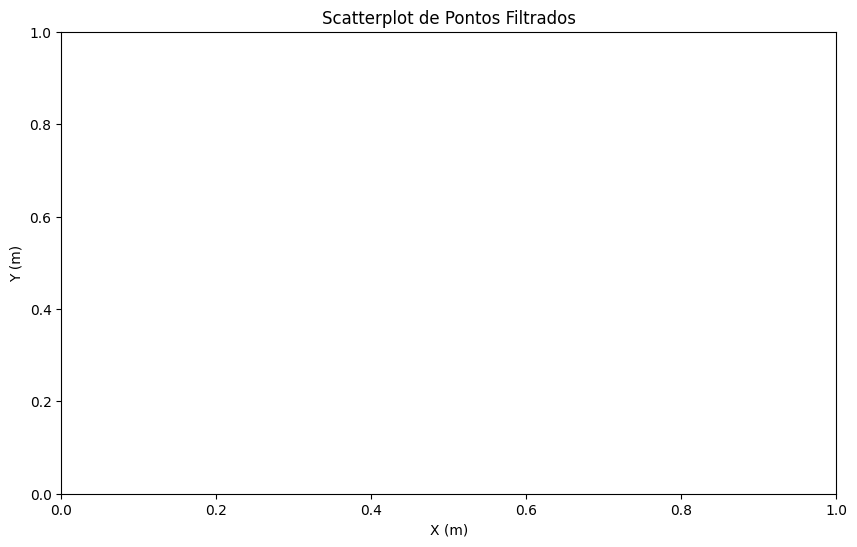

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import os
from matplotlib.image import imread

# Lendo o arquivo de telemetria
arquivo_telemetria = '/content/drive/MyDrive/ANGLO - DADOS/2022-02e03_modificado_V3.csv'
dados = pd.read_csv(arquivo_telemetria)

# Removendo as colunas que não têm muita função no código
dados = dados.drop(['ShiftId', 'Data', 'Dia', 'Mês', 'Ano', 'Timestamp', 'StartEmpty', 'EndEmpty', 'EndFull', 'PositionX', 'Speed', 'Decimais', '7'], axis=1)

# Adiciona uma coluna com a velocidade arredondada para o múltiplo de 10 mais próximo
dados['Speed_km_h_10'] = np.floor(dados['Speed_km_h'] / 10) * 10

# Carregando as imagens correspondentes a cada área
img_fase4 = imread('/content/drive/MyDrive/ANGLO - DADOS/FASE4_ANGLO.png')
img_britador = imread('/content/drive/MyDrive/ANGLO - DADOS/BRITADOR_ANGLO.png')
img_cascalheira = imread('/content/drive/MyDrive/ANGLO - DADOS/CASCALHEIRA_ANGLO.png')
img_borel = imread('/content/drive/MyDrive/ANGLO - DADOS/BOREL_ANGLO.png')
img_pde = imread('/content/drive/MyDrive/ANGLO - DADOS/PDE_ANGLO.png')
img_stepsul = imread('/content/drive/MyDrive/ANGLO - DADOS/STEPSUL_ANGLO.png')

# Definindo os limites de cada área
limites_areas = [
    ('FASE4', 664870, 665214, 7908550, 7909640, img_fase4),
    ('BRITADOR', 664957, 665774, 7909655, 7911199, img_britador),
    ('CASCALHEIRA', 665214, 666242, 7908957, 7909655, img_cascalheira),
    ('BOREL', 665728, 666741, 7906891, 7908957, img_borel),
    ('PDE', 666252, 667494, 7908966, 7910662, img_pde),
    ('STEPSUL', 665728, 668065, 7904231, 7906977, img_stepsul)
]

# Gerando as opções para o filtro interativo
opcoes = {
    'EquipmentId': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in dados['EquipmentId'].unique()}}),
    'dif_speed_20p': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in dados['Speed_km_h_10'].unique()}}),
    'DataMin': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in sorted(dados['Data_Ok'].unique(), key=lambda x: pd.to_datetime(x, format='%d/%m/%Y'))}}),
    'DataMax': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in sorted(dados['Data_Ok'].unique(), key=lambda x: pd.to_datetime(x, format='%d/%m/%Y'))}}),
    'Shift': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in dados['Shift'].unique()}}),
    'Payload': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in dados['Payload'].unique()}}),
    'Coordenadas': widgets.Dropdown(options={'Todos': None, **{area: area for area, _, _, _, _, _ in limites_areas}})
}

# Função para filtrar os dados e gerar o scatterplot interativo
def filtro_interativo(EquipmentId, dif_speed_20p, DataMin, DataMax, Shift, Payload, Coordenadas):
    # Filtrando os dados com base nos valores selecionados nos widgets
    df_filtrado = dados.copy()
    for key, value in locals().items():
        if value is not None and key in df_filtrado.columns:
            df_filtrado = df_filtrado[df_filtrado[key] == value]

    # Criando o scatterplot com os pontos filtrados
    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    #ax.set_aspect('equal', adjustable='box')

    for area, xmin, xmax, ymin, ymax, img in limites_areas:
        if Coordenadas == area:
            plt.plot([xmin, xmax, xmax, xmin, xmin], [ymin, ymin, ymax, ymax, ymin], 'k--')
            plt.text(xmin, ymin, area, fontsize=8, ha='left', va='top')

            if img is not None:
                ax.imshow(img, extent=[xmin, xmax, ymin, ymax], alpha=1)

            if not df_filtrado.empty:
                df_area = df_filtrado[(df_filtrado['X'] >= xmin) & (df_filtrado['X'] <= xmax) & (df_filtrado['Y'] >= ymin) & (df_filtrado['Y'] <= ymax)]
                plt.scatter(df_area['X'], df_area['Y'], c='r', s=2)

    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    plt.title('Scatterplot de Pontos Filtrados')
    #plt.grid(True)
    plt.show()

# Criando os widgets para o filtro interativo
widgets_interativos = [widgets.interactive(filtro_interativo, **opcoes)]

# Exibindo os widgets
for widget in widgets_interativos:
    display(widget)


# Testando melhorias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import os
from matplotlib.image import imread

# Lendo o arquivo de telemetria
arquivo_telemetria = '/content/drive/MyDrive/ANGLO - DADOS/2022-02e03_modificado_V3.csv'
dados = pd.read_csv(arquivo_telemetria)

# Removendo as colunas que não têm muita função no código
dados = dados.drop(['ShiftId', 'Data', 'Dia', 'Mês', 'Ano', 'Timestamp', 'StartEmpty', 'EndEmpty', 'EndFull', 'PositionX', 'Speed', 'Decimais', '7'], axis=1)

# Adiciona uma coluna com a velocidade arredondada para o múltiplo de 10 mais próximo
dados['Speed_km_h_10'] = np.floor(dados['Speed_km_h'] / 10) * 10

# Carregando as imagens correspondentes a cada área
img_fase4 = imread('/content/drive/MyDrive/ANGLO - DADOS/FASE4_ANGLO.png')
img_britador = imread('/content/drive/MyDrive/ANGLO - DADOS/BRITADOR_ANGLO.png')
img_cascalheira = imread('/content/drive/MyDrive/ANGLO - DADOS/CASCALHEIRA_ANGLO.png')
img_borel = imread('/content/drive/MyDrive/ANGLO - DADOS/BOREL_ANGLO.png')
img_pde = imread('/content/drive/MyDrive/ANGLO - DADOS/PDE_ANGLO.png')
img_stepsul = imread('/content/drive/MyDrive/ANGLO - DADOS/STEPSUL_ANGLO.png')

# Definindo os limites de cada área
limites_areas = [
    ('FASE4', 664870, 665214, 7908550, 7909640, img_fase4),
    ('BRITADOR', 664957, 665774, 7909655, 7911199, img_britador),
    ('CASCALHEIRA', 665214, 666242, 7908957, 7909655, img_cascalheira),
    ('BOREL', 665728, 666741, 7906891, 7908957, img_borel),
    ('PDE', 666252, 667494, 7908966, 7910662, img_pde),
    ('STEPSUL', 665728, 668065, 7904231, 7906977, img_stepsul)
]

# Criando o diretório para salvar as imagens
diretorio_imagens = '/content/drive/MyDrive/ANGLO - DADOS/imagens_plotadas'
os.makedirs(diretorio_imagens, exist_ok=True)

# Gerando as opções para o filtro interativo
opcoes = {
    'EquipmentId': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in dados['EquipmentId'].unique()}}),
    'dif_speed_20p': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in dados['Speed_km_h_10'].unique()}}),
    'DataMin': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in sorted(dados['Data_Ok'].unique(), key=lambda x: pd.to_datetime(x, format='%d/%m/%Y'))}}),
    'DataMax': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in sorted(dados['Data_Ok'].unique(), key=lambda x: pd.to_datetime(x, format='%d/%m/%Y'))}}),
    'Shift': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in dados['Shift'].unique()}}),
    'Payload': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in dados['Payload'].unique()}}),
    'Coordenadas': widgets.Dropdown(options={'Todos': None, **{area: area for area, _, _, _, _, _ in limites_areas}})
}

# Função para filtrar os dados e gerar o scatterplot interativo
def filtro_interativo(EquipmentId, dif_speed_20p, DataMin, DataMax, Shift, Payload, Coordenadas):
    # Filtrando os dados com base nos valores selecionados nos widgets
    df_filtrado = dados.copy()
    for key, value in locals().items():
        if value is not None and key in df_filtrado.columns:
            df_filtrado = df_filtrado[df_filtrado[key] == value]

    # Criando o scatterplot com os pontos filtrados
    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    #ax.set_aspect('equal', adjustable='box')

    for area, xmin, xmax, ymin, ymax, img in limites_areas:
        if Coordenadas == area:
            plt.plot([xmin, xmax, xmax, xmin, xmin], [ymin, ymin, ymax, ymax, ymin], 'k--')
            plt.text(xmin, ymin, area, fontsize=8, ha='left', va='top')

            if img is not None:
                ax.imshow(img, extent=[xmin, xmax, ymin, ymax], alpha=1)

            if not df_filtrado.empty:
                df_area = df_filtrado[(df_filtrado['X'] >= xmin) & (df_filtrado['X'] <= xmax) & (df_filtrado['Y'] >= ymin) & (df_filtrado['Y'] <= ymax)]
                plt.scatter(df_area['X'], df_area['Y'], c='r', s=2)

    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    plt.title('Scatterplot de Pontos Filtrados')
    #plt.grid(True)
    plt.savefig(os.path.join(diretorio_imagens, f'{dif_speed_20p}_{Coordenadas}_scatterplot.png'))  # Salva a imagem plotada
    plt.show()

# Criando os widgets para o filtro interativo
widgets_interativos = [widgets.interactive(filtro_interativo, **opcoes)]

# Exibindo os widgets
for widget in widgets_interativos:
    display(widget)



interactive(children=(Dropdown(description='EquipmentId', options={'Todos': None, 'CA-1001   ': 'CA-1001   ', …

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import os
from matplotlib.image import imread

# Lendo o arquivo de telemetria
arquivo_telemetria = '/content/drive/MyDrive/ANGLO - DADOS/2022-02e03_modificado_V3.csv'
dados = pd.read_csv(arquivo_telemetria)

# Removendo as colunas que não têm muita função no código
dados = dados.drop(['ShiftId', 'Data', 'Dia', 'Mês', 'Ano', 'Timestamp', 'StartEmpty', 'EndEmpty', 'EndFull', 'PositionX', 'Speed', 'Decimais', '7'], axis=1)

# Adiciona uma coluna com a velocidade arredondada para o múltiplo de 10 mais próximo
dados['Speed_km_h_10'] = np.floor(dados['Speed_km_h'] / 10) * 10

# Carregando as imagens correspondentes a cada área
img_fase4 = imread('/content/drive/MyDrive/ANGLO - DADOS/FASE4_ANGLO.png')
img_britador = imread('/content/drive/MyDrive/ANGLO - DADOS/BRITADOR_ANGLO.png')
img_cascalheira = imread('/content/drive/MyDrive/ANGLO - DADOS/CASCALHEIRA_ANGLO.png')
img_borel = imread('/content/drive/MyDrive/ANGLO - DADOS/BOREL_ANGLO.png')
img_pde = imread('/content/drive/MyDrive/ANGLO - DADOS/PDE_ANGLO.png')
img_stepsul = imread('/content/drive/MyDrive/ANGLO - DADOS/STEPSUL_ANGLO.png')

# Definindo os limites de cada área
limites_areas = [
    ('FASE4', 664870, 665214, 7908550, 7909640, img_fase4),
    ('BRITADOR', 664957, 665774, 7909655, 7911199, img_britador),
    ('CASCALHEIRA', 665214, 666242, 7908957, 7909655, img_cascalheira),
    ('BOREL', 665728, 666741, 7906891, 7908957, img_borel),
    ('PDE', 666252, 667494, 7908966, 7910662, img_pde),
    ('STEPSUL', 665728, 668065, 7904231, 7906977, img_stepsul)
]

# Criando o diretório para salvar as imagens
diretorio_imagens = '/content/drive/MyDrive/ANGLO - DADOS/imagens_plotadas'
os.makedirs(diretorio_imagens, exist_ok=True)

# Gerando as opções para o filtro interativo
opcoes = {

    'EquipmentId': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in dados['EquipmentId'].unique()}}),
    'dif_speed_20p': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in dados['Speed_km_h_10'].unique()}}),
    'DataMin': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in sorted(dados['Data_Ok'].unique(), key=lambda x: pd.to_datetime(x, format='%d/%m/%Y'))}}),
    'DataMax': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in sorted(dados['Data_Ok'].unique(), key=lambda x: pd.to_datetime(x, format='%d/%m/%Y'))}}),
    'Shift': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in dados['Shift'].unique()}}),
    'Payload': widgets.Dropdown(options={'Todos': None, 'Cheio': 'Cheio', 'Vazio': 'Vazio'}),
    'Coordenadas': widgets.Dropdown(options={'Todos': None, **{area: area for area, _, _, _, _, _ in limites_areas}})
}

# Função para filtrar os dados e gerar o scatterplot interativo
def filtro_interativo(EquipmentId, dif_speed_20p, DataMin, DataMax, Shift, Payload, Coordenadas):
    # Filtrando os dados com base nos valores selecionados nos widgets
    df_filtrado = dados.copy()
    for key, value in locals().items():
        if value is not None and key in df_filtrado.columns:
            df_filtrado = df_filtrado[df_filtrado[key] == value]

    # Criando o scatterplot com os pontos filtrados
    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    #ax.set_aspect('equal', adjustable='box')

    for area, xmin, xmax, ymin, ymax, img in limites_areas:
        if Coordenadas == area:
            plt.plot([xmin, xmax, xmax, xmin, xmin], [ymin, ymin, ymax, ymax, ymin], 'k--')
            plt.text(xmin, ymin, area, fontsize=8, ha='left', va='top')

            if img is not None:
                ax.imshow(img, extent=[xmin, xmax, ymin, ymax], alpha=1)

            if not df_filtrado.empty:
                df_area = df_filtrado[(df_filtrado['X'] >= xmin) & (df_filtrado['X'] <= xmax) & (df_filtrado['Y'] >= ymin) & (df_filtrado['Y'] <= ymax)]

                if Payload == 'Cheio':
                    max_speed = 28
                elif Payload == 'Vazio':
                    max_speed = 40

                df_area_filtered = df_area[df_area['Speed_km_h'] <= max_speed * 0.9]
                df_area_filtered_high = df_area[df_area['Speed_km_h'] > max_speed * 0.9]

                plt.scatter(df_area_filtered['X'], df_area_filtered['Y'], c='r', s=2, label='Veloc < 90% benckmark')
                plt.scatter(df_area_filtered_high['X'], df_area_filtered_high['Y'], c='b', s=2, label='Veloc_aceitável')

    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    plt.title('Análise de velocidades')
    plt.legend()
    #plt.grid(True)
    plt.savefig(os.path.join(diretorio_imagens, f'{EquipmentId}_{Coordenadas}_{dif_speed_20p}_scatterplot.png'))  # Salva a imagem plotada
    plt.show()

# Criando os widgets para o filtro interativo
widgets_interativos = [widgets.interactive(filtro_interativo, **opcoes)]

# Exibindo os widgets
for widget in widgets_interativos:
    display(widget)


interactive(children=(Dropdown(description='EquipmentId', options={'Todos': None, 'CA-1001   ': 'CA-1001   ', …

#Aqui temos algo mais aceitável

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import os
from matplotlib.image import imread

# Lendo o arquivo de telemetria
arquivo_telemetria = '/content/drive/MyDrive/ANGLO - DADOS/2022-02e03_modificado_V3.csv'
dados = pd.read_csv(arquivo_telemetria)

# Removendo as colunas que não têm muita função no código
dados = dados.drop(['ShiftId', 'Data', 'Dia', 'Mês', 'Ano', 'Timestamp', 'StartEmpty', 'EndEmpty', 'EndFull', 'PositionX', 'Speed', 'Decimais', '7'], axis=1)

# Adiciona uma coluna com a velocidade arredondada para o múltiplo de 10 mais próximo
dados['Speed_km_h_10'] = np.floor(dados['Speed_km_h'] / 10) * 10

# Carregando as imagens correspondentes a cada área
img_fase4 = imread('/content/drive/MyDrive/ANGLO - DADOS/FASE4_ANGLO.png')
img_britador = imread('/content/drive/MyDrive/ANGLO - DADOS/BRITADOR_ANGLO.png')
img_cascalheira = imread('/content/drive/MyDrive/ANGLO - DADOS/CASCALHEIRA_ANGLO.png')
img_borel = imread('/content/drive/MyDrive/ANGLO - DADOS/BOREL_ANGLO.png')
img_pde = imread('/content/drive/MyDrive/ANGLO - DADOS/PDE_ANGLO.png')
img_stepsul = imread('/content/drive/MyDrive/ANGLO - DADOS/STEPSUL_ANGLO.png')

# Definindo os limites de cada área
limites_areas = [
    ('FASE4', 664870, 665214, 7908550, 7909640, img_fase4),
    ('BRITADOR', 664957, 665774, 7909655, 7911199, img_britador),
    ('CASCALHEIRA', 665214, 666242, 7908957, 7909655, img_cascalheira),
    ('BOREL', 665728, 666741, 7906891, 7908957, img_borel),
    ('PDE', 666252, 667494, 7908966, 7910662, img_pde),
    ('STEPSUL', 665728, 668065, 7904231, 7906977, img_stepsul)
]

# Criando o diretório para salvar as imagens
diretorio_imagens = '/content/drive/MyDrive/ANGLO - DADOS/imagens_plotadas'
os.makedirs(diretorio_imagens, exist_ok=True)

# Gerando as opções para o filtro interativo
opcoes = {
    'EquipmentId': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in dados['EquipmentId'].unique()}}),
    'DataMin': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in sorted(dados['Data_Ok'].unique(), key=lambda x: pd.to_datetime(x, format='%d/%m/%Y'))}}),
    'DataMax': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in sorted(dados['Data_Ok'].unique(), key=lambda x: pd.to_datetime(x, format='%d/%m/%Y'))}}),
    'Shift': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in dados['Shift'].unique()}}),
    'Payload': widgets.Dropdown(options={'Todos': None, 'Cheio': 'Cheio', 'Vazio': 'Vazio'}),
    'Coordenadas': widgets.Dropdown(options={'Todos': None, **{area: area for area, _, _, _, _, _ in limites_areas}})
}

# Função para filtrar os dados e gerar o scatterplot interativo
def filtro_interativo(EquipmentId, DataMin, DataMax, Shift, Payload, Coordenadas):
    # Filtrando os dados com base nos valores selecionados nos widgets
    df_filtrado = dados.copy()
    for key, value in locals().items():
        if value is not None and key in df_filtrado.columns:
            df_filtrado = df_filtrado[df_filtrado[key] == value]

    # Criando o scatterplot com os pontos filtrados
    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    #ax.set_aspect('equal', adjustable='box')

    for area, xmin, xmax, ymin, ymax, img in limites_areas:
        if Coordenadas == area:
            plt.plot([xmin, xmax, xmax, xmin, xmin], [ymin, ymin, ymax, ymax, ymin], 'k--')
            plt.text(xmin, ymin, area, fontsize=8, ha='left', va='top')

            if img is not None:
                ax.imshow(img, extent=[xmin, xmax, ymin, ymax], alpha=1)

            if not df_filtrado.empty:
                df_area = df_filtrado[(df_filtrado['X'] >= xmin) & (df_filtrado['X'] <= xmax) & (df_filtrado['Y'] >= ymin) & (df_filtrado['Y'] <= ymax)]

                if Payload == 'Cheio':
                    max_speed = 16
                elif Payload == 'Vazio':
                    max_speed = 27

                df_area['Velocidade_prevista'] = max_speed

                df_area_filtered = df_area[df_area['Speed_km_h'] <= max_speed * 0.9]

                plt.scatter(df_area_filtered['X'], df_area_filtered['Y'], c='r', s=2, label='Velocidade < 90% benchmark')

    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    plt.title('Análise de velocidades')
    plt.legend()
    #plt.grid(True)
    plt.savefig(os.path.join(diretorio_imagens, f'{EquipmentId}_{Coordenadas}_scatterplot.png'))  # Salva a imagem plotada
    plt.show()

# Criando os widgets para o filtro interativo
widgets_interativos = [widgets.interactive(filtro_interativo, **opcoes)]

# Exibindo os widgets
for widget in widgets_interativos:
    display(widget)


interactive(children=(Dropdown(description='EquipmentId', options={'Todos': None, 'CA-1001   ': 'CA-1001   ', …

# Correção de erros encontrados dos benchmarks

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import os
from matplotlib.image import imread

# Lendo o arquivo de telemetria
arquivo_telemetria = '/content/drive/MyDrive/ANGLO - DADOS/2022-02e03_modificado_V3.csv'
dados = pd.read_csv(arquivo_telemetria)

# Removendo as colunas que não têm muita função no código
dados = dados.drop(['ShiftId', 'Data', 'Dia', 'Mês', 'Ano', 'Timestamp', 'StartEmpty', 'EndEmpty', 'EndFull', 'PositionX', 'Speed', 'Decimais', '7'], axis=1)

# Adiciona uma coluna com a velocidade arredondada para o múltiplo de 10 mais próximo
dados['Speed_km_h_10'] = np.floor(dados['Speed_km_h'] / 10) * 10

# Carregando as imagens correspondentes a cada área
img_fase4 = imread('/content/drive/MyDrive/ANGLO - DADOS/FASE4_ANGLO.png')
img_britador = imread('/content/drive/MyDrive/ANGLO - DADOS/BRITADOR_ANGLO.png')
img_cascalheira = imread('/content/drive/MyDrive/ANGLO - DADOS/CASCALHEIRA_ANGLO.png')
img_borel = imread('/content/drive/MyDrive/ANGLO - DADOS/BOREL_ANGLO.png')
img_pde = imread('/content/drive/MyDrive/ANGLO - DADOS/PDE_ANGLO.png')
img_stepsul = imread('/content/drive/MyDrive/ANGLO - DADOS/STEPSUL_ANGLO.png')

# Definindo os limites de cada área
limites_areas = [
    ('FASE4', 664870, 665214, 7908550, 7909640, img_fase4),
    ('BRITADOR', 664957, 665774, 7909655, 7911199, img_britador),
    ('CASCALHEIRA', 665214, 666242, 7908957, 7909655, img_cascalheira),
    ('BOREL', 665728, 666741, 7906891, 7908957, img_borel),
    ('PDE', 666252, 667494, 7908966, 7910662, img_pde),
    ('STEPSUL', 665728, 668065, 7904231, 7906977, img_stepsul)
]

# Criando o diretório para salvar as imagens
diretorio_imagens = '/content/drive/MyDrive/ANGLO - DADOS/imagens_plotadas'
os.makedirs(diretorio_imagens, exist_ok=True)

# Gerando as opções para o filtro interativo
opcoes = {
    'EquipmentId': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in dados['EquipmentId'].unique()}}),
    'DataMin': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in sorted(dados['Data_Ok'].unique(), key=lambda x: pd.to_datetime(x, format='%d/%m/%Y'))}}),
    'DataMax': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in sorted(dados['Data_Ok'].unique(), key=lambda x: pd.to_datetime(x, format='%d/%m/%Y'))}}),
    'Shift': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in dados['Shift'].unique()}}),
    'Payload': widgets.Dropdown(options={'Todos': None, 'Cheio': 'Cheio', 'Vazio': 'Vazio'}),
    'Coordenadas': widgets.Dropdown(options={'Todos': None, **{area: area for area, _, _, _, _, _ in limites_areas}})
}

# Função para filtrar os dados e gerar o scatterplot interativo
def filtro_interativo(EquipmentId, DataMin, DataMax, Shift, Payload, Coordenadas):
    # Filtrando os dados com base nos valores selecionados nos widgets
    df_filtrado = dados.copy()
    for key, value in locals().items():
        if value is not None and key in df_filtrado.columns:
            df_filtrado = df_filtrado[df_filtrado[key] == value]

    # Criando o scatterplot com os pontos filtrados
    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    #ax.set_aspect('equal', adjustable='box')

    area_colors = []

    for area, xmin, xmax, ymin, ymax, img in limites_areas:
        if Coordenadas == area:
            plt.plot([xmin, xmax, xmax, xmin, xmin], [ymin, ymin, ymax, ymax, ymin], 'k--')
            plt.text(xmin, ymin, area, fontsize=8, ha='left', va='top')

            if img is not None:
                ax.imshow(img, extent=[xmin, xmax, ymin, ymax], alpha=1)

            if not df_filtrado.empty:
                df_area = df_filtrado[(df_filtrado['X'] >= xmin) & (df_filtrado['X'] <= xmax) & (df_filtrado['Y'] >= ymin) & (df_filtrado['Y'] <= ymax)]

                if Payload == 'Cheio':
                    max_speed = 16
                elif Payload == 'Vazio':
                    max_speed = 27

                df_area['Velocidade_prevista'] = max_speed

                df_area_filtered = df_area[df_area['Speed_km_h'] <= max_speed * 0.9]

                if len(df_area_filtered) / len(df_area) >= 0.9:
                    area_color = 'b'
                elif len(df_area_filtered) / len(df_area) < 0.9:
                    area_color = 'r'
                else:
                    area_color = 'g'

                area_colors.extend([area_color] * len(df_area_filtered))

                plt.scatter(df_area_filtered['X'], df_area_filtered['Y'], c=area_colors, s=2, label='Velocidade < 90% benchmark')

                df_area_above = df_area[df_area['Speed_km_h'] > max_speed]
                if not df_area_above.empty:
                    plt.scatter(df_area_above['X'], df_area_above['Y'], c='g', s=2, label='Velocidade > 100% benchmark')

    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    plt.title('Análise de velocidades')

    legend_labels = ['Velocidade < 90% benchmark']
    unique_colors = list(set(area_colors))
    for color in unique_colors:
        if color == 'b':
            legend_labels.append('Velocidade >= 90% benchmark')
        elif color == 'r':
            legend_labels.append('Velocidade < 90% benchmark')
        else:
            legend_labels.append('Velocidade entre 90% e 100% benchmark')
            legend_labels.append('Velocidade > 100% benchmark')

    plt.legend(labels=legend_labels)

    color_label = 'azul' if 'b' in area_colors else 'vermelho'
    plt.savefig(os.path.join(diretorio_imagens, f'{EquipmentId}_{Coordenadas}_{color_label}_scatterplot.png'))  # Salva a imagem plotada

    plt.show()

# Criando os widgets para o filtro interativo
widgets_interativos = [widgets.interactive(filtro_interativo, **opcoes)]

# Exibindo os widgets
for widget in widgets_interativos:
    display(widget)


interactive(children=(Dropdown(description='EquipmentId', options={'Todos': None, 'CA-1001   ': 'CA-1001   ', …

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import os
from matplotlib.image import imread

# Lendo o arquivo de telemetria
arquivo_telemetria = '/content/drive/MyDrive/ANGLO - DADOS/2022-02e03_modificado_V3.csv'
dados = pd.read_csv(arquivo_telemetria)

# Removendo as colunas que não têm muita função no código
dados = dados.drop(['ShiftId', 'Data', 'Dia', 'Mês', 'Ano', 'Timestamp', 'StartEmpty', 'EndEmpty', 'EndFull', 'PositionX', 'Speed', 'Decimais', '7'], axis=1)

# Adiciona uma coluna com a velocidade arredondada para o múltiplo de 10 mais próximo
dados['Speed_km_h_10'] = np.floor(dados['Speed_km_h'] / 10) * 10

# Carregando as imagens correspondentes a cada área
img_fase4 = imread('/content/drive/MyDrive/ANGLO - DADOS/FASE4_ANGLO.png')
img_britador = imread('/content/drive/MyDrive/ANGLO - DADOS/BRITADOR_ANGLO.png')
img_cascalheira = imread('/content/drive/MyDrive/ANGLO - DADOS/CASCALHEIRA_ANGLO.png')
img_borel = imread('/content/drive/MyDrive/ANGLO - DADOS/BOREL_ANGLO.png')
img_pde = imread('/content/drive/MyDrive/ANGLO - DADOS/PDE_ANGLO.png')
img_stepsul = imread('/content/drive/MyDrive/ANGLO - DADOS/STEPSUL_ANGLO.png')

# Definindo os limites de cada área
limites_areas = [
    ('FASE4', 664870, 665214, 7908550, 7909640, img_fase4),
    ('BRITADOR', 664957, 665774, 7909655, 7911199, img_britador),
    ('CASCALHEIRA', 665214, 666242, 7908957, 7909655, img_cascalheira),
    ('BOREL', 665728, 666741, 7906891, 7908957, img_borel),
    ('PDE', 666252, 667494, 7908966, 7910662, img_pde),
    ('STEPSUL', 665728, 668065, 7904231, 7906977, img_stepsul)
]

# Criando o diretório para salvar as imagens
diretorio_imagens = '/content/drive/MyDrive/ANGLO - DADOS/imagens_plotadas'
os.makedirs(diretorio_imagens, exist_ok=True)

# Gerando as opções para o filtro interativo
opcoes = {
    'EquipmentId': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in dados['EquipmentId'].unique()}}),
    'DataMin': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in sorted(dados['Data_Ok'].unique(), key=lambda x: pd.to_datetime(x, format='%d/%m/%Y'))}}),
    'DataMax': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in sorted(dados['Data_Ok'].unique(), key=lambda x: pd.to_datetime(x, format='%d/%m/%Y'))}}),
    'Shift': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in dados['Shift'].unique()}}),
    'Payload': widgets.Dropdown(options={'Todos': None, 'Cheio': 'Cheio', 'Vazio': 'Vazio'}),
    'Coordenadas': widgets.Dropdown(options={'Todos': None, **{area: area for area, _, _, _, _, _ in limites_areas}})
}

# Função para filtrar os dados e gerar o scatterplot interativo
def filtro_interativo(EquipmentId, DataMin, DataMax, Shift, Payload, Coordenadas):
    # Filtrando os dados com base nos valores selecionados nos widgets
    df_filtrado = dados.copy()
    for key, value in locals().items():
        if value is not None and key in df_filtrado.columns:
            df_filtrado = df_filtrado[df_filtrado[key] == value]

    # Criando o scatterplot com os pontos filtrados
    plt.figure(figsize=(10, 6))
    ax = plt.gca()

    area_colors = []

    for area, xmin, xmax, ymin, ymax, img in limites_areas:
        if Coordenadas == area:
            plt.plot([xmin, xmax, xmax, xmin, xmin], [ymin, ymin, ymax, ymax, ymin], 'k--')
            plt.text(xmin, ymin, area, fontsize=8, ha='left', va='top')

            if img is not None:
                ax.imshow(img, extent=[xmin, xmax, ymin, ymax], alpha=1)

            if not df_filtrado.empty:
                df_area = df_filtrado[(df_filtrado['X'] >= xmin) & (df_filtrado['X'] <= xmax) & (df_filtrado['Y'] >= ymin) & (df_filtrado['Y'] <= ymax)]

                if Payload == 'Cheio':
                    max_speed = 16
                elif Payload == 'Vazio':
                    max_speed = 27

                df_area['Velocidade_prevista'] = max_speed

                df_area_filtered = df_area[df_area['Speed_km_h'] <= max_speed * 0.9]

                if len(df_area_filtered) / len(df_area) >= 0.9:
                    area_color = 'b'
                elif len(df_area_filtered) / len(df_area) < 0.9:
                    area_color = 'r'
                else:
                    area_color = 'g'

                area_colors.extend([area_color] * len(df_area_filtered))

                plt.scatter(df_area_filtered['X'], df_area_filtered['Y'], c=area_color, s=2, label='Velocidade < 90% benchmark')

                df_area_above = df_area[df_area['Speed_km_h'] > max_speed]
                if not df_area_above.empty:
                    plt.scatter(df_area_above['X'], df_area_above['Y'], c='g', s=2, label='Velocidade > 100% benchmark')

    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    plt.title('Análise de velocidades')

    legend_labels = ['Velocidade < 90% benchmark']
    unique_colors = list(set(area_colors))
    if 'b' in unique_colors:
        legend_labels.append('Velocidade >= 90% benchmark')
    if 'g' in unique_colors:
        legend_labels.append('Velocidade > 100% benchmark')

    plt.legend(labels=legend_labels)

    color_label = 'azul' if 'b' in area_colors else 'vermelho'
    plt.savefig(os.path.join(diretorio_imagens, f'{EquipmentId}_{Coordenadas}_{color_label}_scatterplot.png'))  # Salva a imagem plotada

    plt.show()

# Criando os widgets para o filtro interativo
widgets_interativos = [widgets.interactive(filtro_interativo, **opcoes)]

# Exibindo os widgets
for widget in widgets_interativos:
    display(widget)


interactive(children=(Dropdown(description='EquipmentId', options={'Todos': None, 'CA-1001   ': 'CA-1001   ', …

interactive(children=(Dropdown(description='EquipmentId', options={'Todos': None, 'CA-1001   ': 'CA-1001   ', …

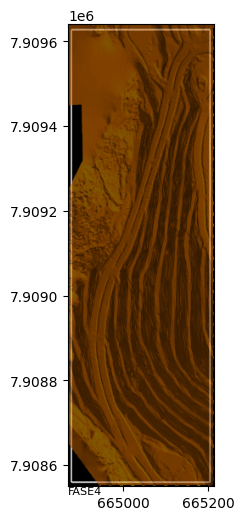

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import os
from matplotlib.image import imread

# Lendo o arquivo de telemetria
arquivo_telemetria = '/content/drive/MyDrive/ANGLO - DADOS/2022-02e03_modificado_V3.csv'
dados = pd.read_csv(arquivo_telemetria)

# Removendo as colunas que não têm muita função no código
dados = dados.drop(['ShiftId', 'Data', 'Dia', 'Mês', 'Ano', 'Timestamp', 'StartEmpty', 'EndEmpty', 'EndFull', 'PositionX', 'Speed', 'Decimais', '7'], axis=1)

# Adiciona uma coluna com a velocidade arredondada para o múltiplo de 10 mais próximo
dados['Speed_km_h_10'] = np.floor(dados['Speed_km_h'] / 10) * 10

# Carregando as imagens correspondentes a cada área
img_fase4 = imread('/content/drive/MyDrive/ANGLO - DADOS/FASE4_ANGLO.png')
img_britador = imread('/content/drive/MyDrive/ANGLO - DADOS/BRITADOR_ANGLO.png')
img_cascalheira = imread('/content/drive/MyDrive/ANGLO - DADOS/CASCALHEIRA_ANGLO.png')
img_borel = imread('/content/drive/MyDrive/ANGLO - DADOS/BOREL_ANGLO.png')
img_pde = imread('/content/drive/MyDrive/ANGLO - DADOS/PDE_ANGLO.png')
img_stepsul = imread('/content/drive/MyDrive/ANGLO - DADOS/STEPSUL_ANGLO.png')

# Definindo os limites de cada área
limites_areas = [
    ('FASE4', 664870, 665214, 7908550, 7909640, img_fase4),
    ('BRITADOR', 664957, 665774, 7909655, 7911199, img_britador),
    ('CASCALHEIRA', 665214, 666242, 7908957, 7909655, img_cascalheira),
    ('BOREL', 665728, 666741, 7906891, 7908957, img_borel),
    ('PDE', 666252, 667494, 7908966, 7910662, img_pde),
    ('STEPSUL', 665728, 668065, 7904231, 7906977, img_stepsul)
]

# Criando o diretório para salvar as imagens
diretorio_imagens = '/content/drive/MyDrive/ANGLO - DADOS/imagens_plotadas'
os.makedirs(diretorio_imagens, exist_ok=True)

# Gerando as opções para o filtro interativo
opcoes = {
    'EquipmentId': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in dados['EquipmentId'].unique()}}),
    'DataMin': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in sorted(dados['Data_Ok'].unique(), key=lambda x: pd.to_datetime(x, format='%d/%m/%Y'))}}),
    'DataMax': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in sorted(dados['Data_Ok'].unique(), key=lambda x: pd.to_datetime(x, format='%d/%m/%Y'))}}),
    'Shift': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in dados['Shift'].unique()}}),
    'Payload': widgets.Dropdown(options={'Todos': None, 'Cheio': 'Cheio', 'Vazio': 'Vazio'}),
    'Coordenadas': widgets.Dropdown(options={'Todos': None, **{area: area for area, _, _, _, _, _ in limites_areas}}),
    'Categoria': widgets.Dropdown(options={'Todos': None, 'Abaixo de 90%': 'Below BM', 'Entre 90% e 100%': 'BM', 'Acima do benchmark': 'Above BM'})
}

# Função para filtrar os dados e gerar o scatterplot interativo
def filtro_interativo(EquipmentId, DataMin, DataMax, Shift, Payload, Coordenadas, Categoria):
    # Filtrando os dados com base nos valores selecionados nos widgets
    df_filtrado = dados.copy()
    for key, value in locals().items():
        if value is not None and key in df_filtrado.columns:
            df_filtrado = df_filtrado[df_filtrado[key] == value]

    # Criando o scatterplot com os pontos filtrados
    plt.figure(figsize=(10, 6))
    ax = plt.gca()

    for area, xmin, xmax, ymin, ymax, img in limites_areas:
        if Coordenadas == area:
            plt.plot([xmin, xmax, xmax, xmin, xmin], [ymin, ymin, ymax, ymax, ymin], 'k--')
            plt.text(xmin, ymin, area, fontsize=8, ha='left', va='top')

            if img is not None:
                ax.imshow(img, extent=[xmin, xmax, ymin, ymax], alpha=1)

            if not df_filtrado.empty:
                df_area = df_filtrado[(df_filtrado['X'] >= xmin) & (df_filtrado['X'] <= xmax) & (df_filtrado['Y'] >= ymin) & (df_filtrado['Y'] <= ymax)]

                if Payload == 'Cheio':
                    max_speed = 28
                elif Payload == 'Vazio':
                    max_speed = 21

                df_area['Velocidade_prevista'] = max_speed

                if Categoria == 'Below BM':
                    df_area_filtered = df_area[df_area['Speed_km_h'] < max_speed * 0.9]
                elif Categoria == 'BM':
                    df_area_filtered = df_area[(df_area['Speed_km_h'] >= max_speed * 0.9) & (df_area['Speed_km_h'] <= max_speed)]
                elif Categoria == 'Above BM':
                    df_area_filtered = df_area[df_area['Speed_km_h'] > max_speed]

                if not df_area_filtered.empty:
                    if Categoria == 'Below BM':
                        area_color = 'tab:orange'
                    elif Categoria == 'BM':
                        area_color = 'g'
                    elif Categoria == 'Above BM':
                        area_color = 'r'

                    plt.scatter(df_area_filtered['X'], df_area_filtered['Y'], c=area_color, s=5, label=f'{Categoria}')

    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    plt.title('Velocity Analysis')

    plt.legend()

    color_label = 'vermelho' if Categoria == 'Below BM' else 'amarelo' if Categoria == 'BM' else 'verde'
    plt.savefig(os.path.join(diretorio_imagens, f'{EquipmentId}_{Coordenadas}_{color_label}_scatterplot.png'))  # Salva a imagem plotada

    plt.show()

# Criando os widgets para o filtro interativo
widgets_interativos = [widgets.interactive(filtro_interativo, **opcoes)]

# Exibindo os widgets
for widget in widgets_interativos:
    display(widget)


### Usando histograma para as velocidades

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import os
from matplotlib.image import imread

# Lendo o arquivo de telemetria
arquivo_telemetria = '/content/drive/MyDrive/ANGLO - DADOS/2022-02e03_modificado_V3.csv'
dados = pd.read_csv(arquivo_telemetria)

# Removendo as colunas que não têm muita função no código
dados = dados.drop(['ShiftId', 'Data', 'Dia', 'Mês', 'Ano', 'Timestamp', 'StartEmpty', 'EndEmpty', 'EndFull', 'PositionX', 'Speed', 'Decimais', '7'], axis=1)

# Adiciona uma coluna com a velocidade arredondada para o múltiplo de 10 mais próximo
dados['Speed_km_h_10'] = np.floor(dados['Speed_km_h'] / 10) * 10

# Carregando as imagens correspondentes a cada área
img_fase4 = imread('/content/drive/MyDrive/ANGLO - DADOS/FASE4_ANGLO.png')
img_britador = imread('/content/drive/MyDrive/ANGLO - DADOS/BRITADOR_ANGLO.png')
img_cascalheira = imread('/content/drive/MyDrive/ANGLO - DADOS/CASCALHEIRA_ANGLO.png')
img_borel = imread('/content/drive/MyDrive/ANGLO - DADOS/BOREL_ANGLO.png')
img_pde = imread('/content/drive/MyDrive/ANGLO - DADOS/PDE_ANGLO.png')
img_stepsul = imread('/content/drive/MyDrive/ANGLO - DADOS/STEPSUL_ANGLO.png')

# Definindo os limites de cada área
limites_areas = [
    ('FASE4', 664870, 665214, 7908550, 7909640, img_fase4),
    ('BRITADOR', 664957, 665774, 7909655, 7911199, img_britador),
    ('CASCALHEIRA', 665214, 666242, 7908957, 7909655, img_cascalheira),
    ('BOREL', 665728, 666741, 7906891, 7908957, img_borel),
    ('PDE', 666252, 667494, 7908966, 7910662, img_pde),
    ('STEPSUL', 665728, 668065, 7904231, 7906977, img_stepsul)
]

# Criando o diretório para salvar as imagens
diretorio_imagens = '/content/drive/MyDrive/ANGLO - DADOS/imagens_plotadas'
os.makedirs(diretorio_imagens, exist_ok=True)

# Gerando as opções para o filtro interativo
opcoes = {
    'EquipmentId': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in dados['EquipmentId'].unique()}}),
    'DataMin': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in sorted(dados['Data_Ok'].unique(), key=lambda x: pd.to_datetime(x, format='%d/%m/%Y'))}}),
    'DataMax': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in sorted(dados['Data_Ok'].unique(), key=lambda x: pd.to_datetime(x, format='%d/%m/%Y'))}}),
    'Shift': widgets.Dropdown(options={'Todos': None, **{str(valor): valor for valor in dados['Shift'].unique()}}),
    'Payload': widgets.Dropdown(options={'Todos': None, 'Cheio': 'Cheio', 'Vazio': 'Vazio'}),
    'Coordenadas': widgets.Dropdown(options={'Todos': None, **{area: area for area, _, _, _, _, _ in limites_areas}}),
    'Categoria': widgets.Dropdown(options={'Todos': None, 'Abaixo de 90%': 'Below BM', 'Entre 90% e 100%': 'BM', 'Acima do benchmark': 'Above BM'})
}

# Função para criar histogramas
def criar_histograma(df, categoria, payload):
    plt.figure(figsize=(8, 6))

    if payload == 'Cheio':
        max_speed = 28
    elif payload == 'Vazio':
        max_speed = 21

    filtro = None  # Defina um valor padrão para filtro

    if categoria == 'Abaixo de 90%':
        filtro = df['Speed_km_h'] < max_speed * 0.9
        title = f'Histórico de Velocidades Abaixo de 90% para Payload {payload}'
    elif categoria == 'Entre 90% e 100%':
        filtro = (df['Speed_km_h'] >= max_speed * 0.9) & (df['Speed_km_h'] <= max_speed)
        title = f'Histórico de Velocidades Entre 90% e 100% para Payload {payload}'
    elif categoria == 'Acima do benchmark':
        filtro = df['Speed_km_h'] > max_speed
        title = f'Histórico de Velocidades Acima do Benchmark para Payload {payload}'

    if filtro is not None:
        velocidades_filtradas = df[filtro]['Speed_km_h']

        plt.hist(velocidades_filtradas, bins=20, color='b', alpha=0.7)
        plt.axvline(x=max_speed, color='r', linestyle='--', label=f'Limite de Velocidade ({max_speed} km/h)')

        plt.xlabel('Velocidade (km/h)')
        plt.ylabel('Contagem')
        plt.title(title)
        plt.legend()
        plt.show()

# Função para filtrar os dados e gerar o histograma
def filtro_interativo(EquipmentId, DataMin, DataMax, Shift, Payload, Coordenadas, Categoria):
    # Filtrando os dados com base nos valores selecionados nos widgets
    df_filtrado = dados.copy()
    for key, value in locals().items():
        if value is not None and key in df_filtrado.columns:
            df_filtrado = df_filtrado[df_filtrado[key] == value]

    # Criando histogramas para os payloads vazio e cheio
    if not df_filtrado.empty:
        for payload_type in ['Cheio', 'Vazio']:
            plt.figure()  # Crie uma nova figura
            criar_histograma(df_filtrado[df_filtrado['Payload'] == payload_type], Categoria, payload_type)

# Criando os widgets para o filtro interativo
widgets_interativos = [widgets.interactive(filtro_interativo, **opcoes)]

# Exibindo os widgets
for widget in widgets_interativos:
    display(widget)


interactive(children=(Dropdown(description='EquipmentId', options={'Todos': None, 'CA-1001   ': 'CA-1001   ', …

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

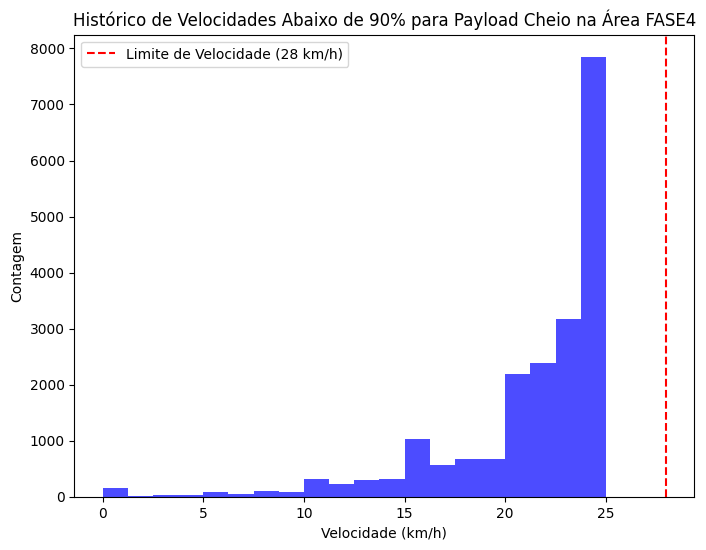

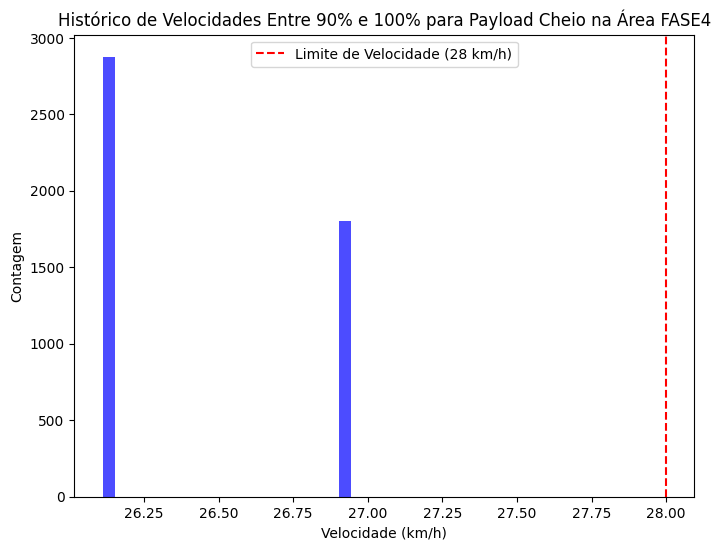

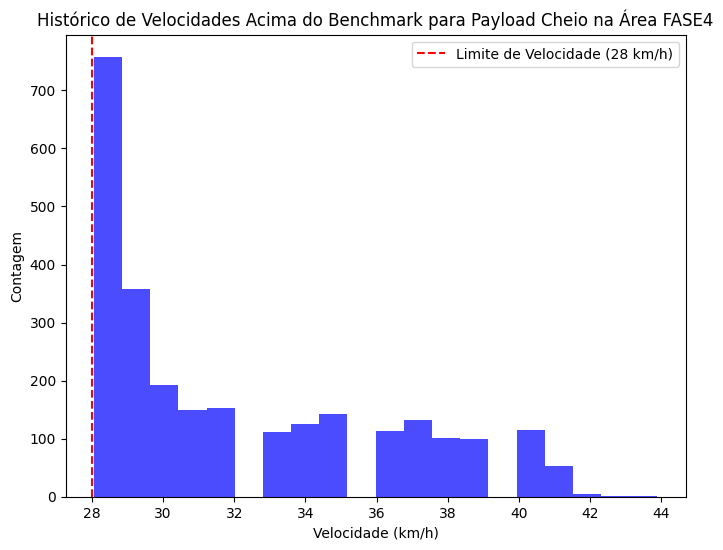

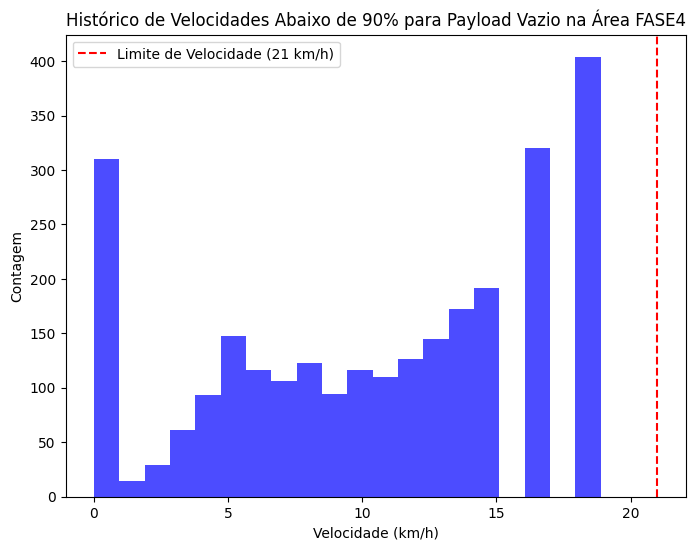

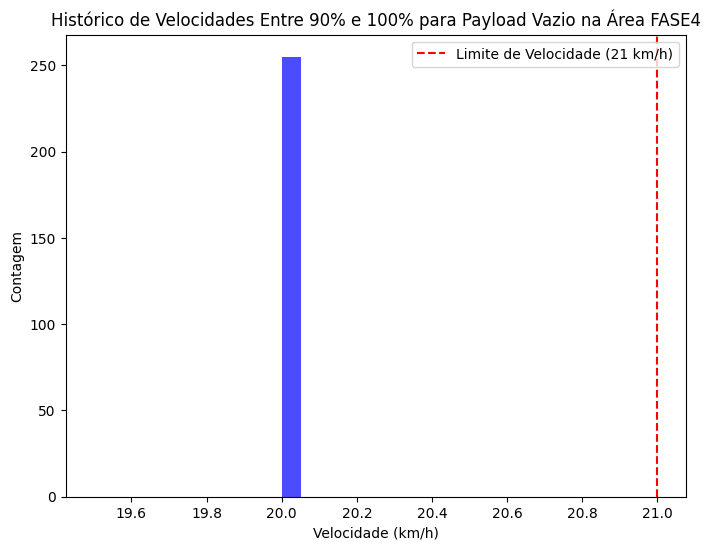

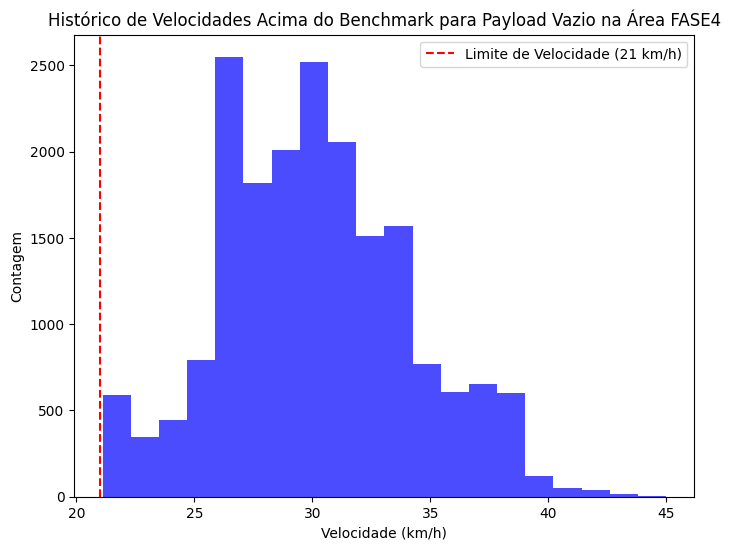

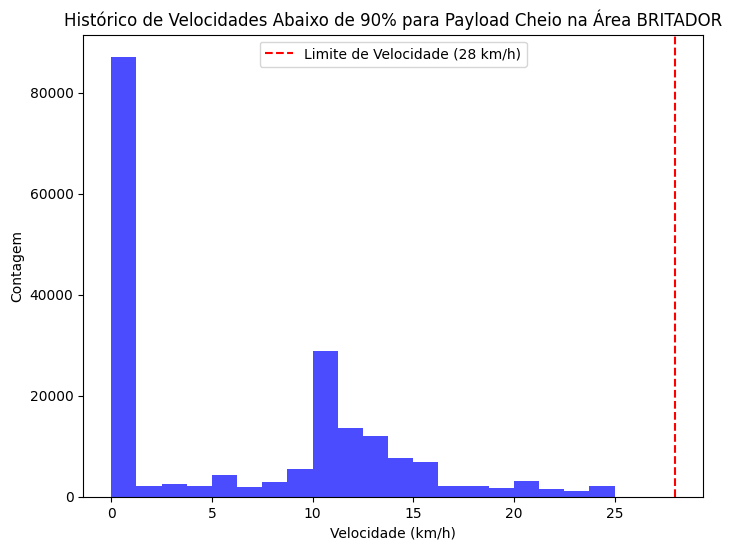

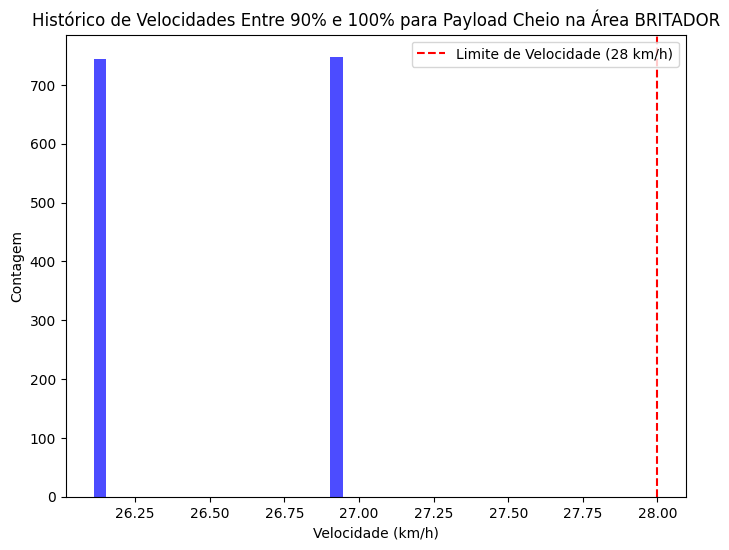

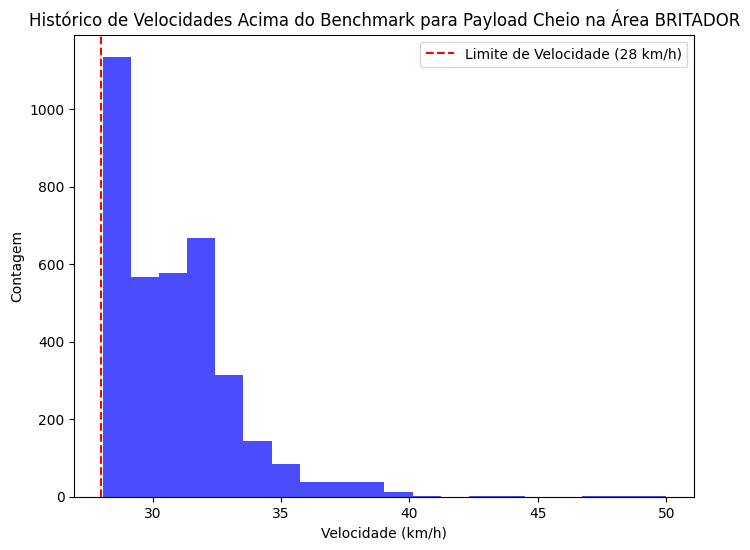

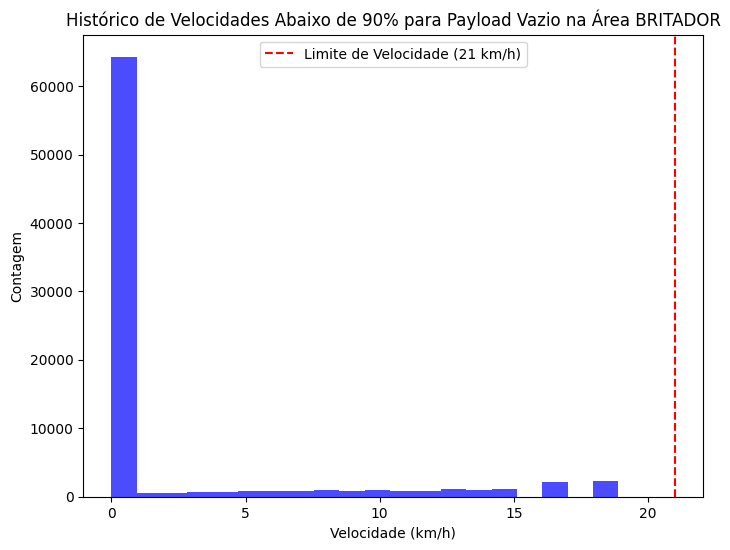

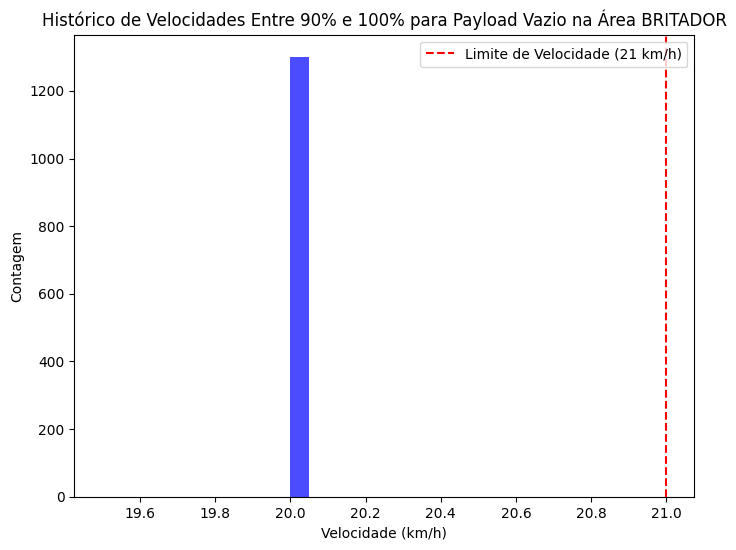

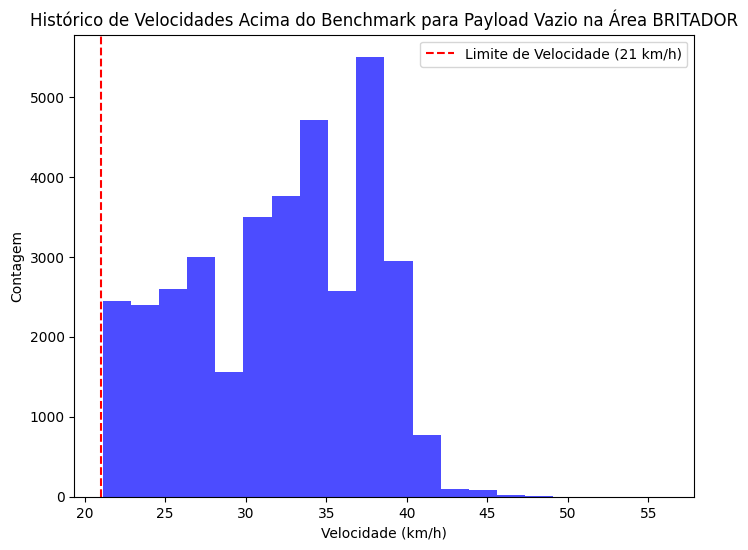

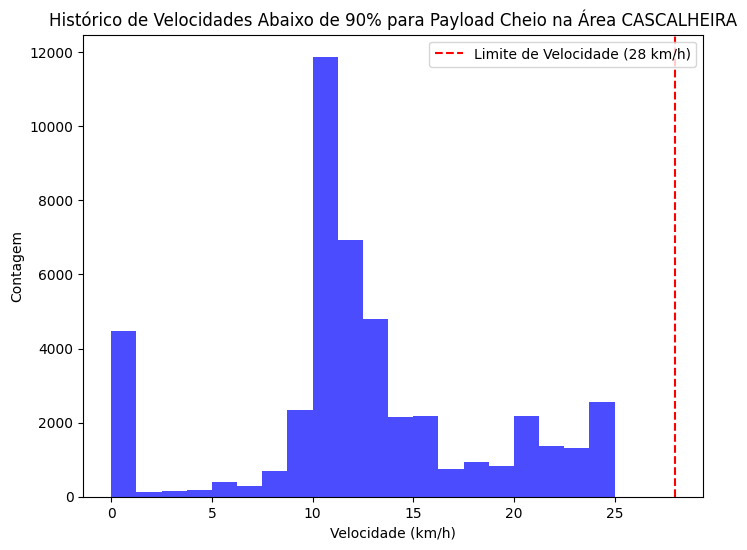

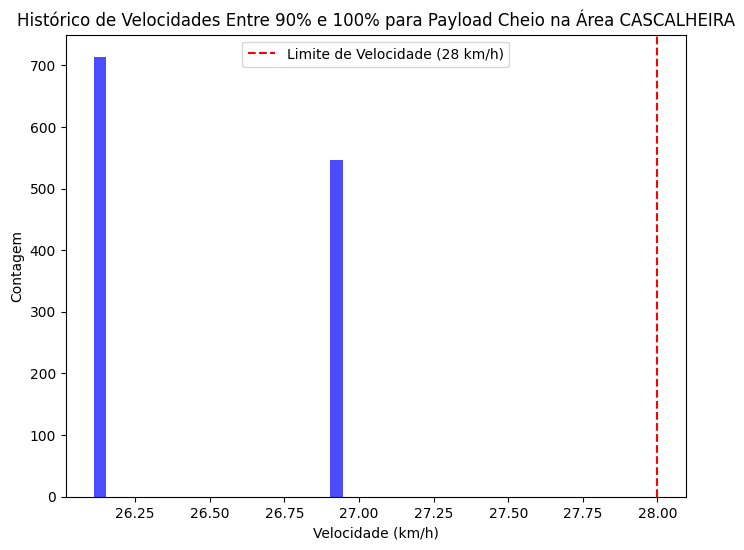

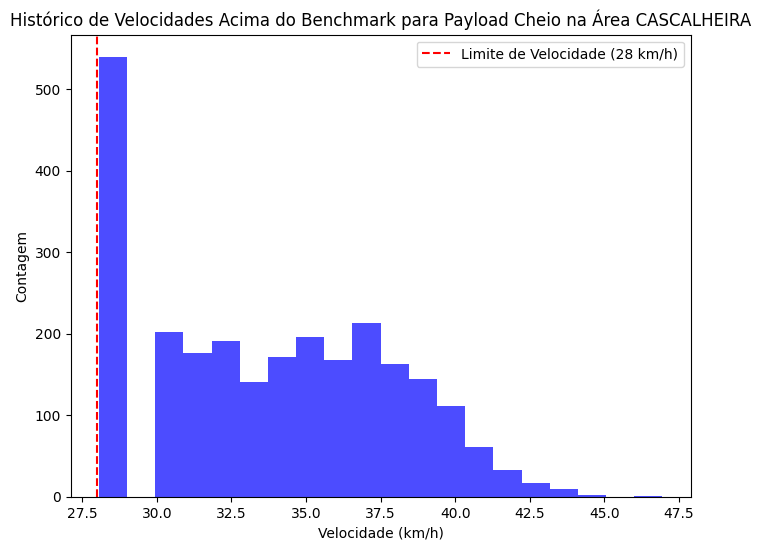

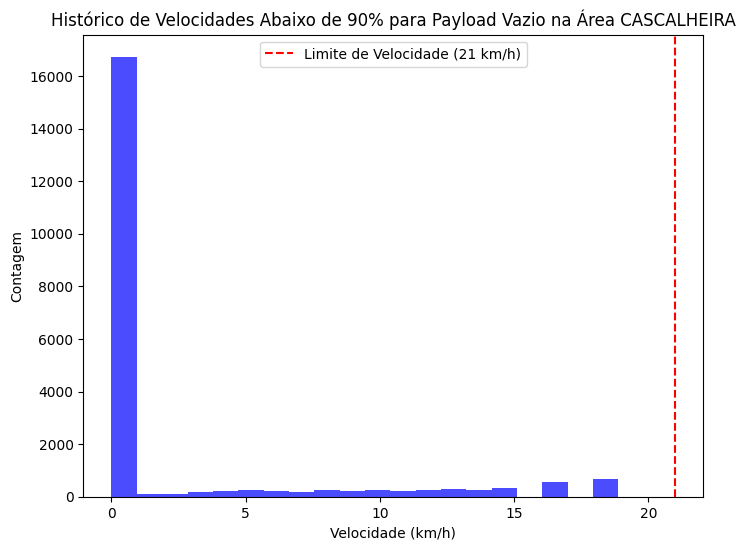

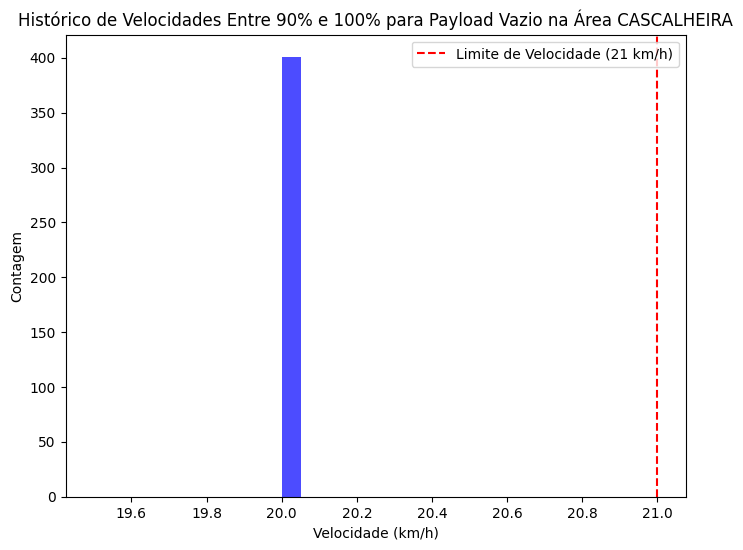

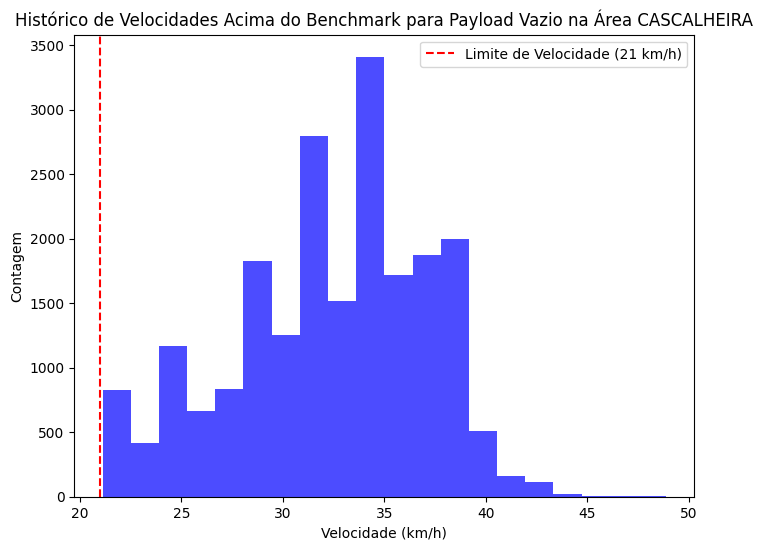

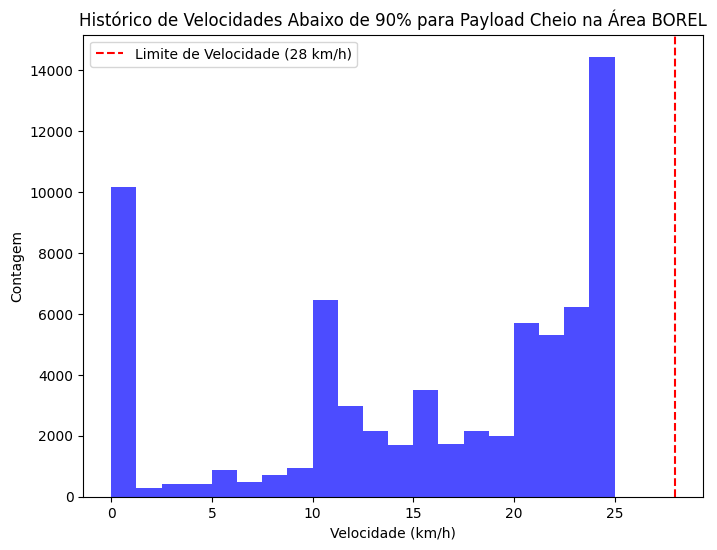

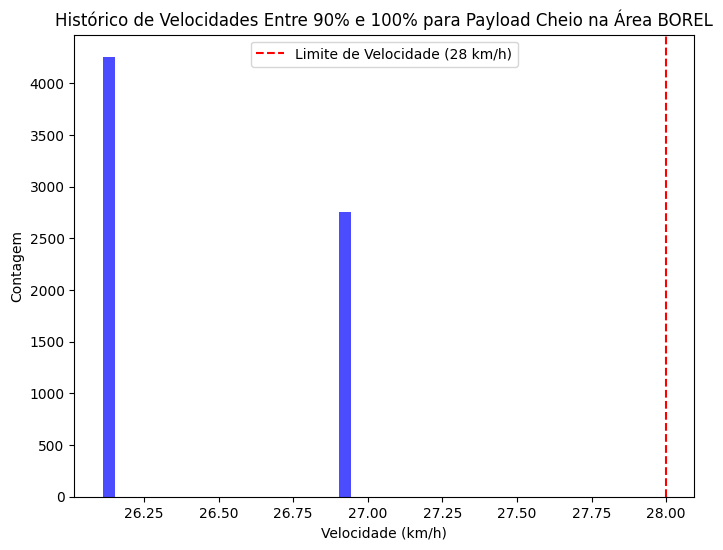

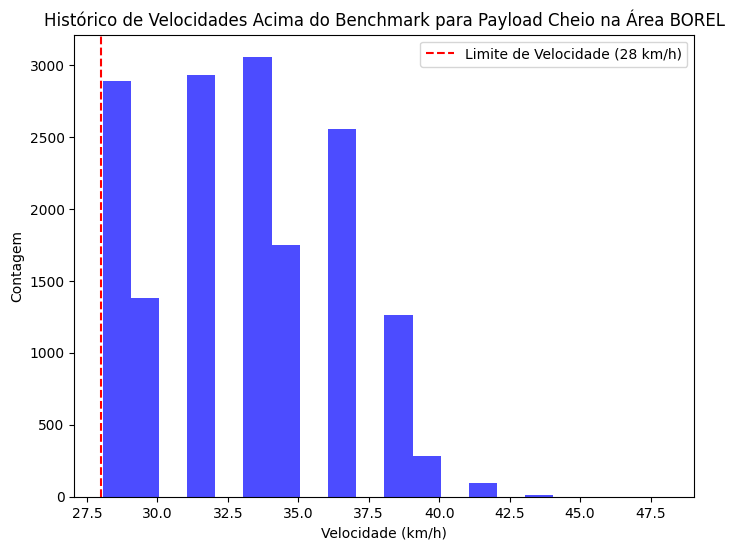

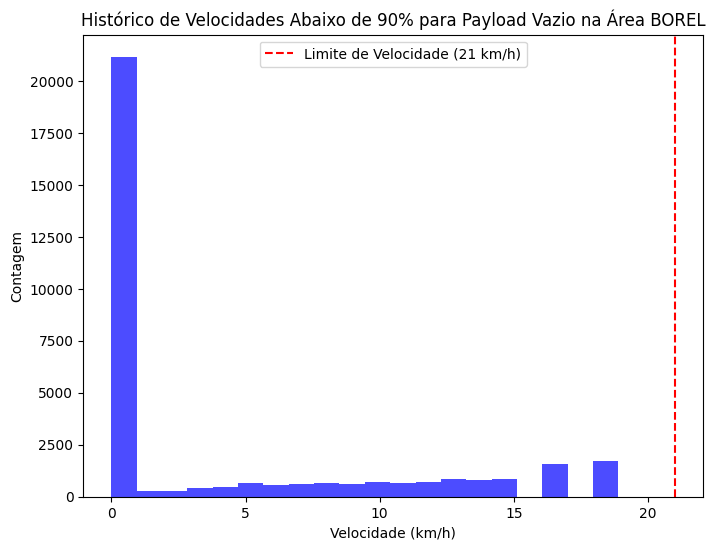

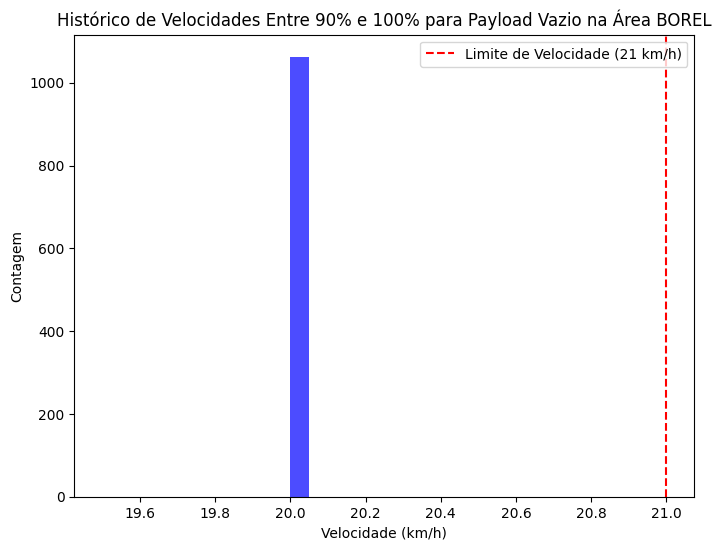

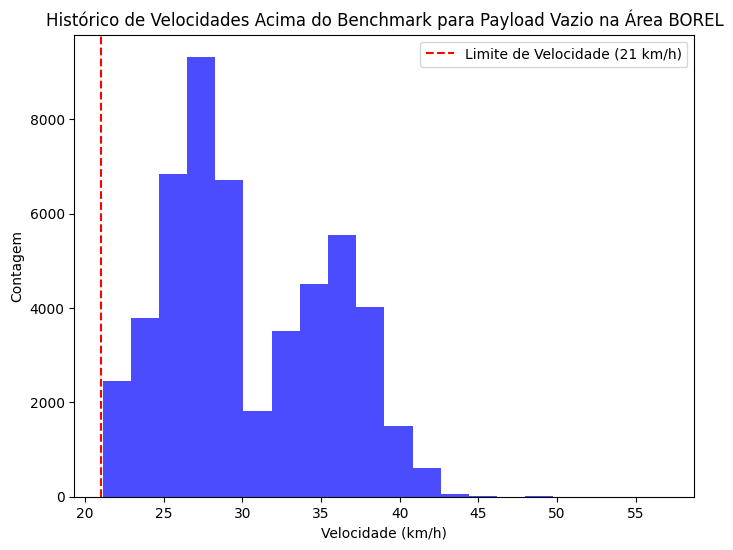

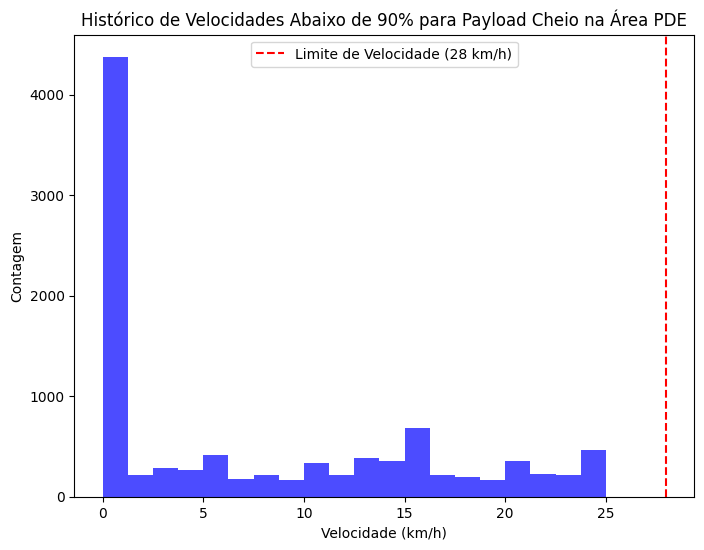

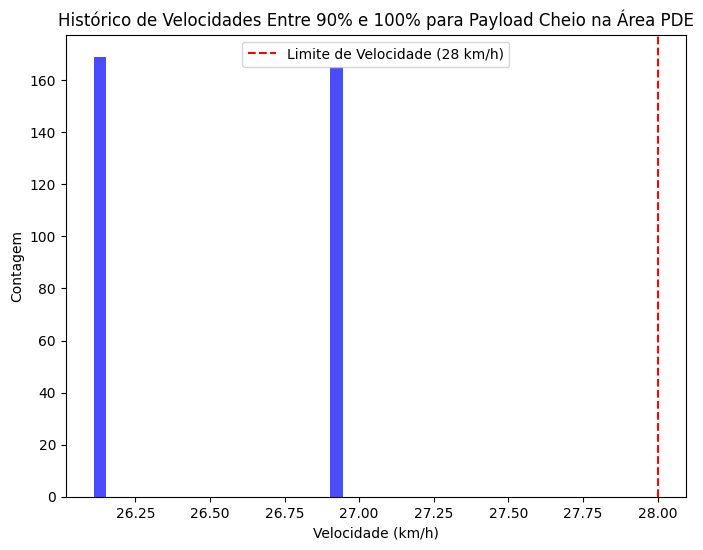

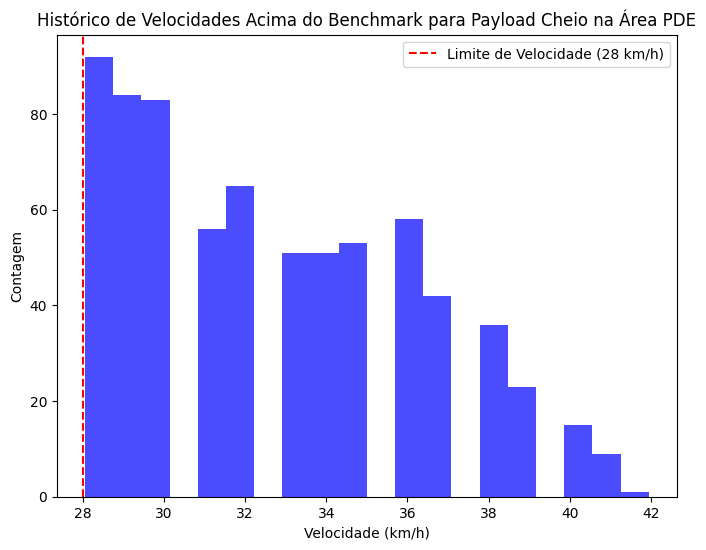

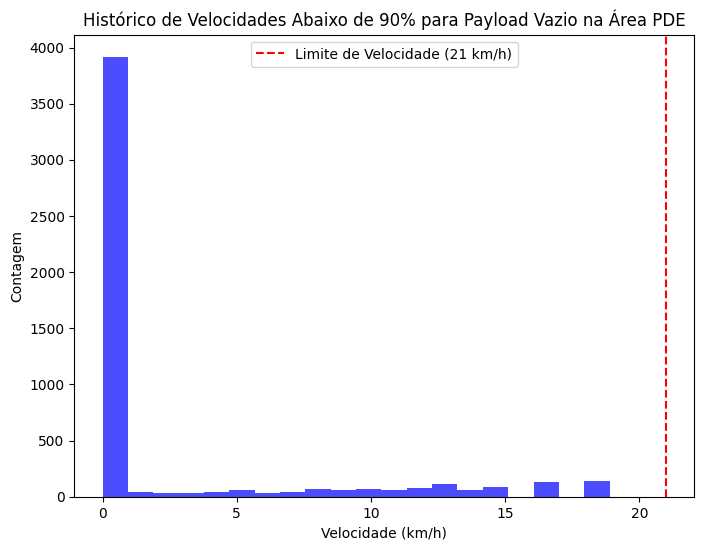

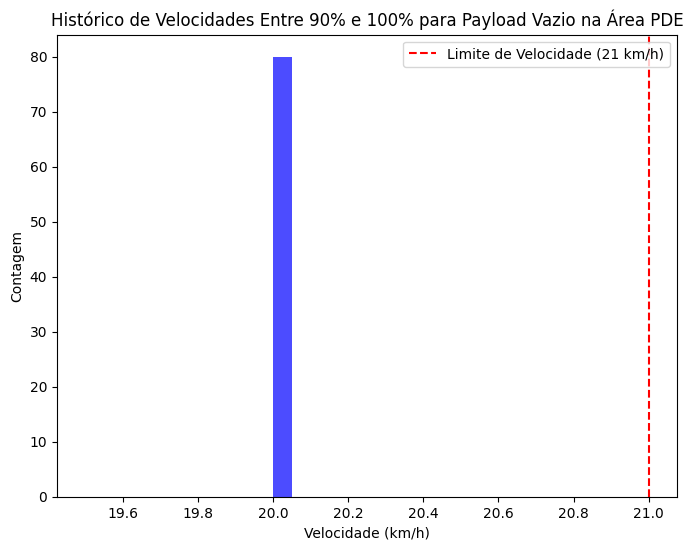

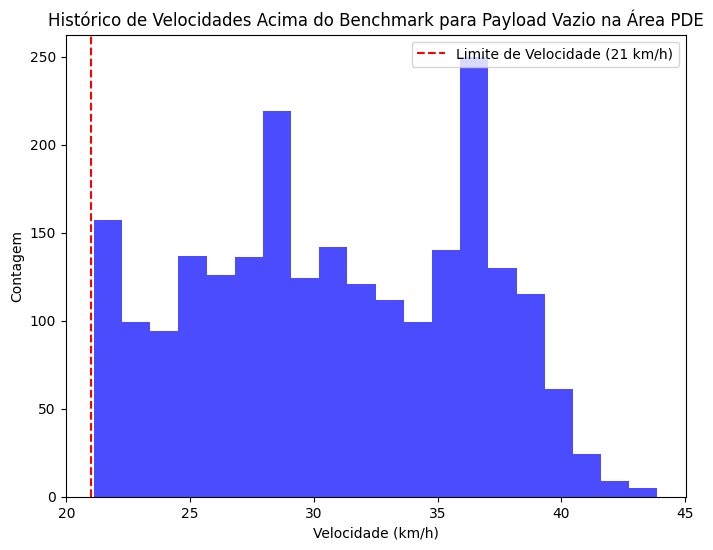

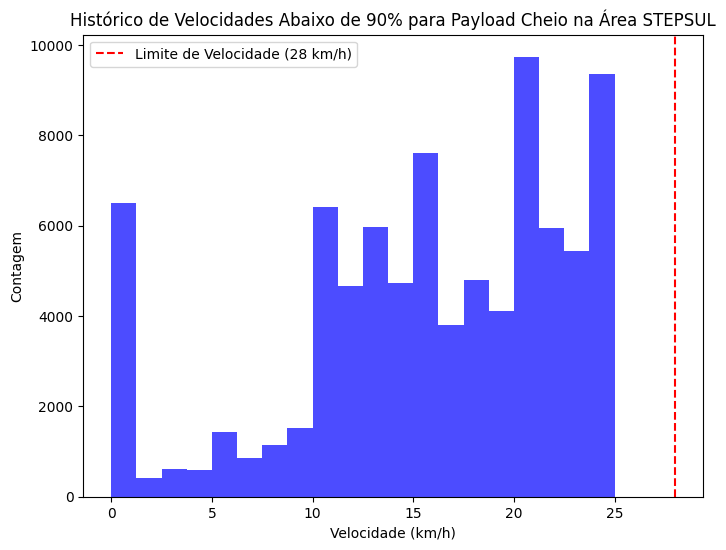

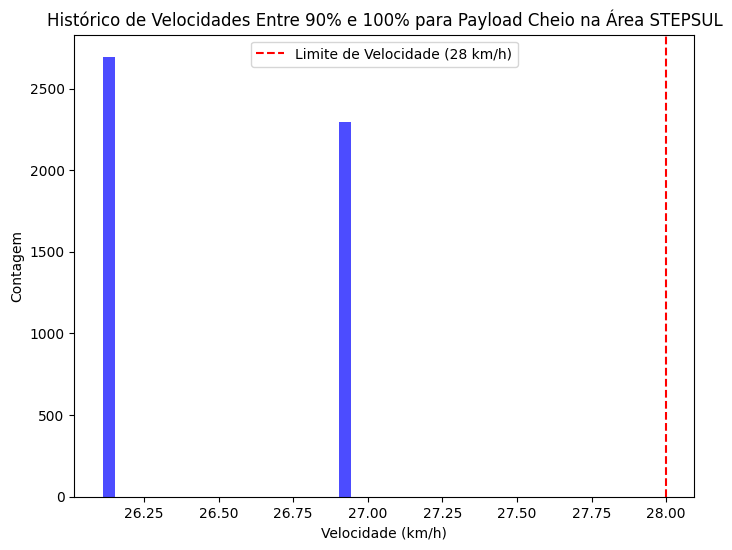

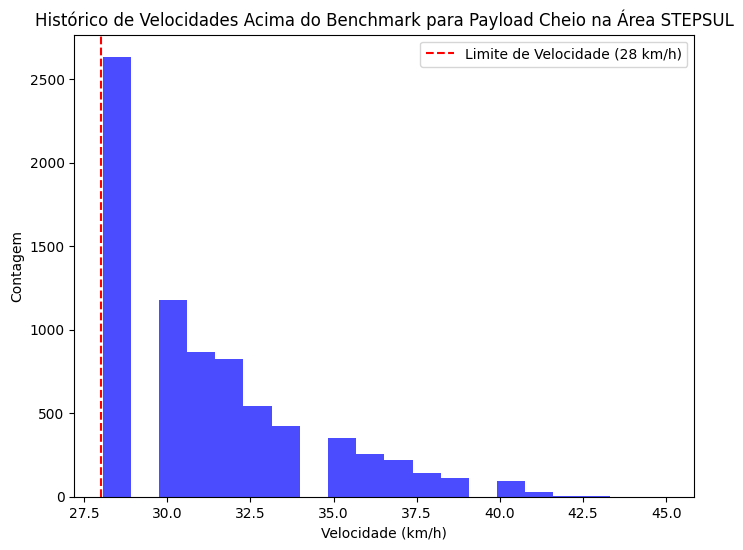

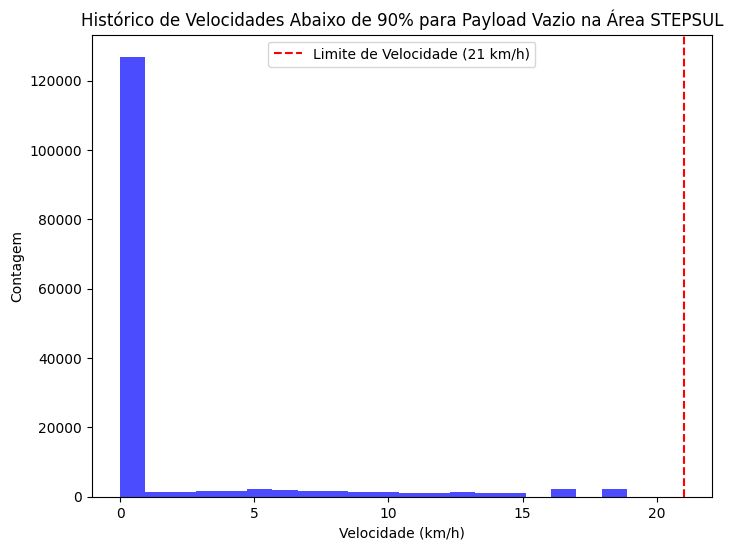

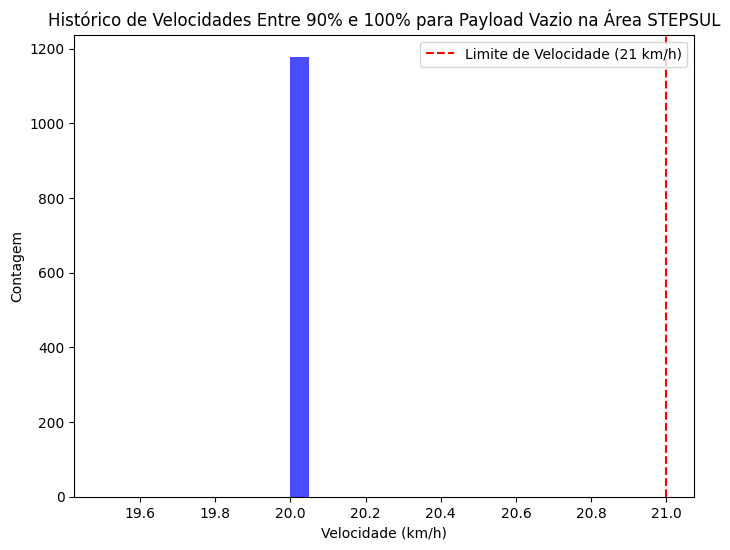

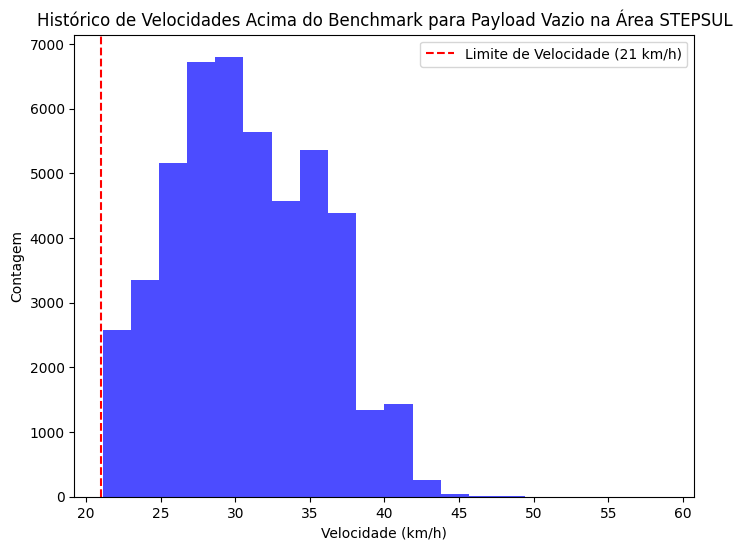

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.image import imread

# Lendo o arquivo de telemetria
arquivo_telemetria = '/content/drive/MyDrive/ANGLO - DADOS/2022-02e03_modificado_V3.csv'
dados = pd.read_csv(arquivo_telemetria)

# Removendo as colunas que não têm muita função no código
dados = dados.drop(['ShiftId', 'Data', 'Dia', 'Mês', 'Ano', 'Timestamp', 'StartEmpty', 'EndEmpty', 'EndFull', 'PositionX', 'Speed', 'Decimais', '7'], axis=1)

# Adiciona uma coluna com a velocidade arredondada para o múltiplo de 10 mais próximo
dados['Speed_km_h_10'] = np.floor(dados['Speed_km_h'] / 10) * 10

# Definindo os limites de cada área
limites_areas = [
    ('FASE4', 664870, 665214, 7908550, 7909640),
    ('BRITADOR', 664957, 665774, 7909655, 7911199),
    ('CASCALHEIRA', 665214, 666242, 7908957, 7909655),
    ('BOREL', 665728, 666741, 7906891, 7908957),
    ('PDE', 666252, 667494, 7908966, 7910662),
    ('STEPSUL', 665728, 668065, 7904231, 7906977)
]

# Criando o diretório para salvar as imagens
diretorio_imagens = '/content/drive/MyDrive/ANGLO - DADOS/imagens_plotadas'
os.makedirs(diretorio_imagens, exist_ok=True)

# Função para criar histogramas
def criar_histograma(df, categoria, payload, area):
    plt.figure(figsize=(8, 6))

    if payload == 'Cheio':
        max_speed = 28
    elif payload == 'Vazio':
        max_speed = 21

    filtro = None

    if categoria == 'Abaixo de 90%':
        filtro = df['Speed_km_h'] < max_speed * 0.9
        title = f'Histórico de Velocidades Abaixo de 90% para Payload {payload} na Área {area}'
    elif categoria == 'Entre 90% e 100%':
        filtro = (df['Speed_km_h'] >= max_speed * 0.9) & (df['Speed_km_h'] <= max_speed)
        title = f'Histórico de Velocidades Entre 90% e 100% para Payload {payload} na Área {area}'
    elif categoria == 'Acima do benchmark':
        filtro = df['Speed_km_h'] > max_speed
        title = f'Histórico de Velocidades Acima do Benchmark para Payload {payload} na Área {area}'

    if filtro is not None:
        velocidades_filtradas = df[filtro]['Speed_km_h']

        plt.hist(velocidades_filtradas, bins=20, color='b', alpha=0.7)
        plt.axvline(x=max_speed, color='r', linestyle='--', label=f'Limite de Velocidade ({max_speed} km/h)')

        plt.xlabel('Velocidade (km/h)')
        plt.ylabel('Contagem')
        plt.title(title)
        plt.legend()

        # Salvar a imagem plotada
        file_name = f'{payload}_{area}_{categoria}_histogram.png'
        file_path = os.path.join(diretorio_imagens, file_name)
        plt.savefig(file_path)

        plt.show()

# Loop sobre as áreas
for area, xmin, xmax, ymin, ymax in limites_areas:
    for payload_type in ['Cheio', 'Vazio']:
        for categoria in ['Abaixo de 90%', 'Entre 90% e 100%', 'Acima do benchmark']:
            df_area = dados[(dados['X'] >= xmin) & (dados['X'] <= xmax) & (dados['Y'] >= ymin) & (dados['Y'] <= ymax)]
            df_area_payload = df_area[df_area['Payload'] == payload_type]

            if not df_area_payload.empty:
                criar_histograma(df_area_payload, categoria, payload_type, area)


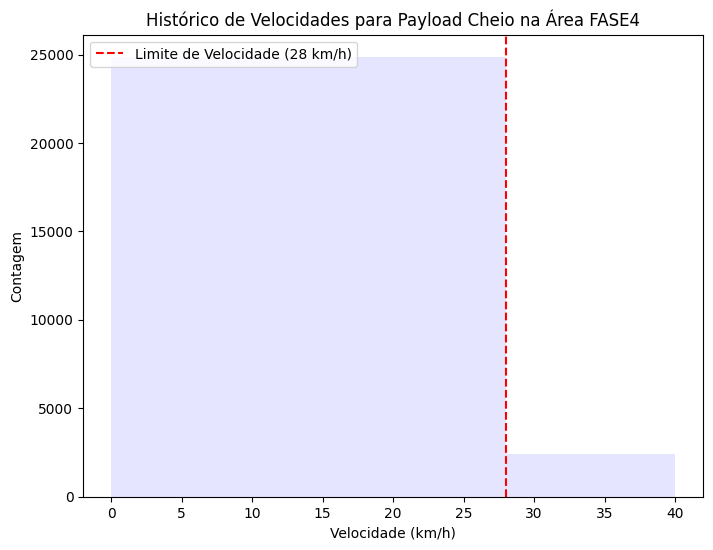

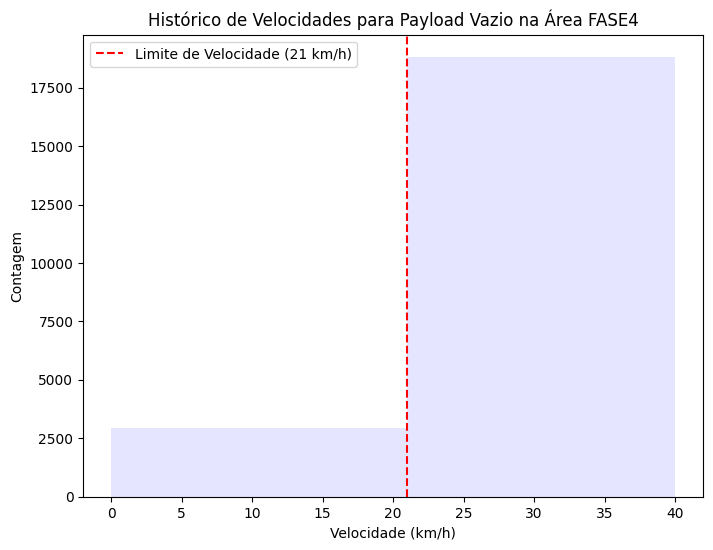

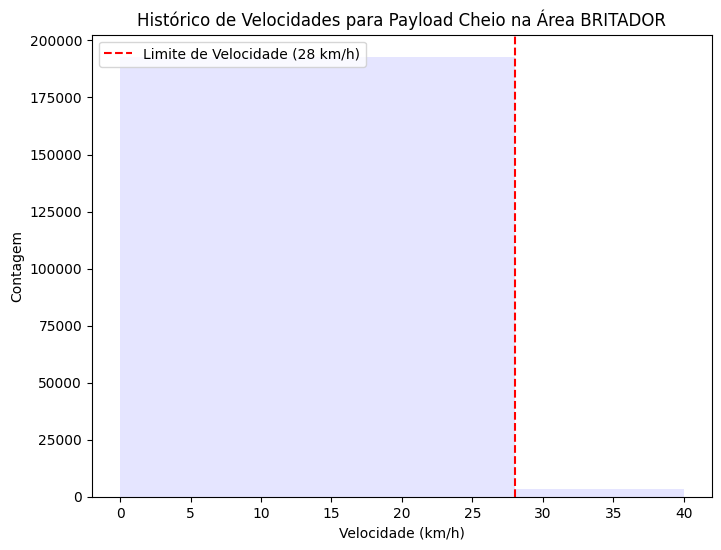

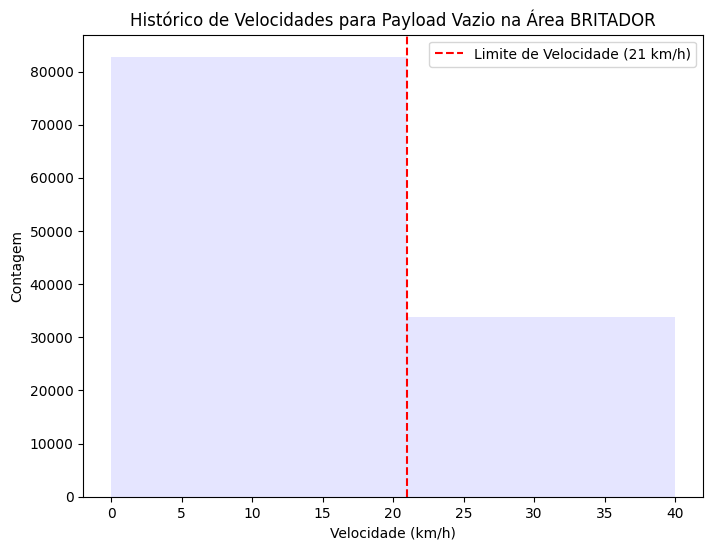

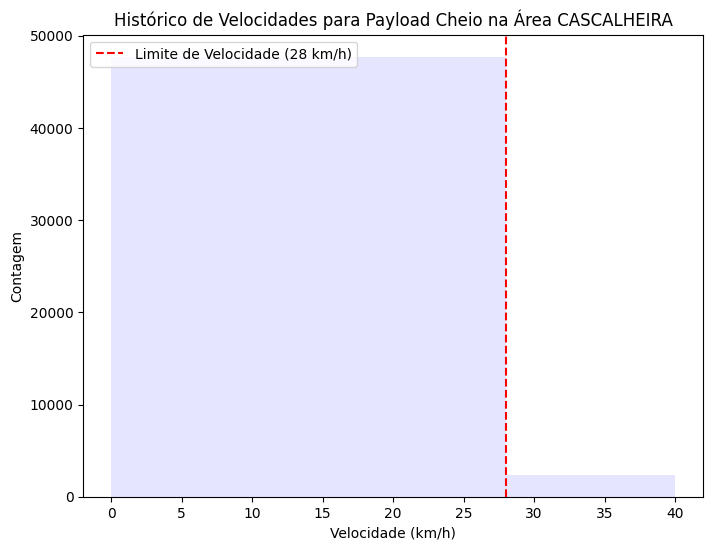

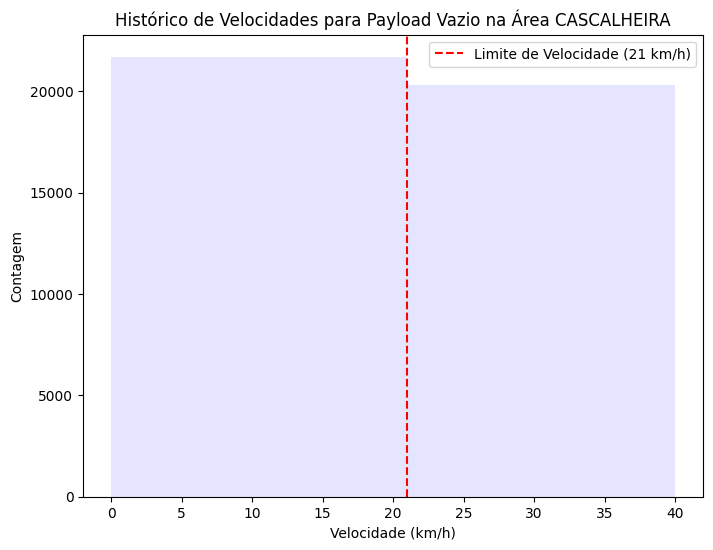

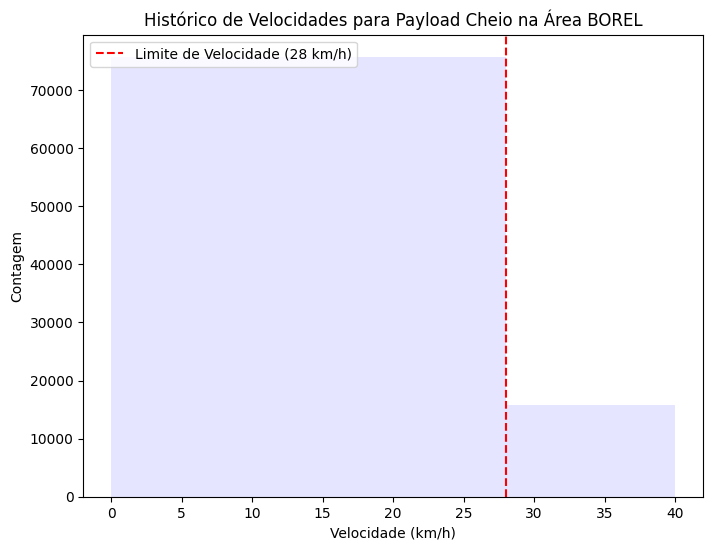

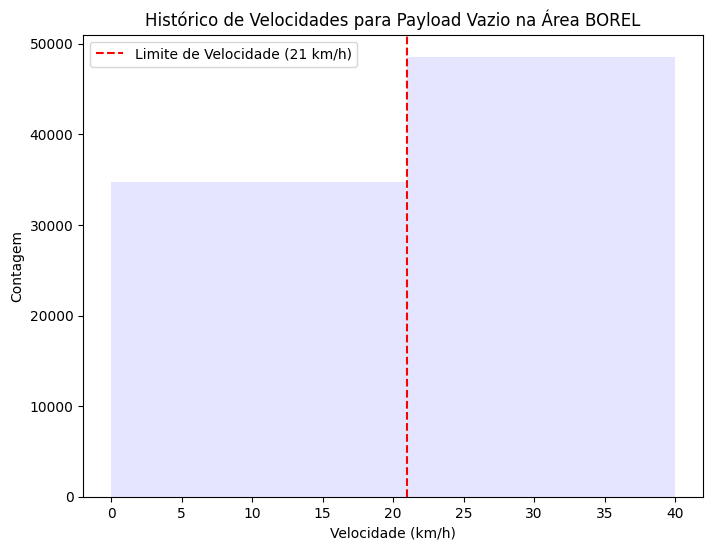

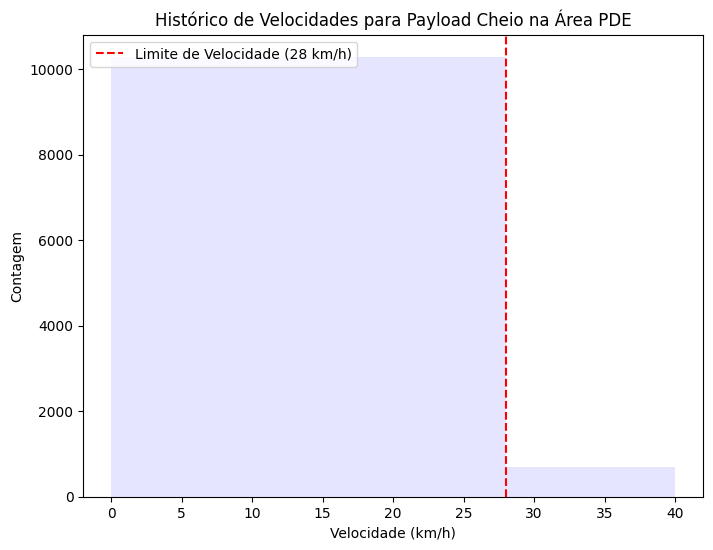

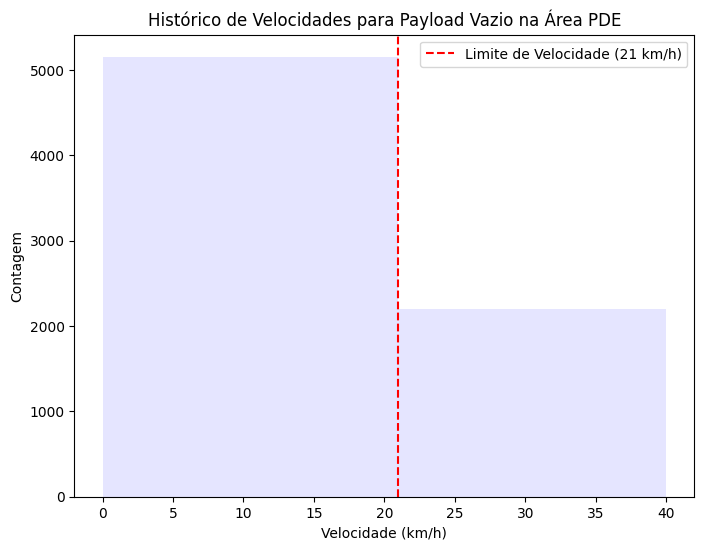

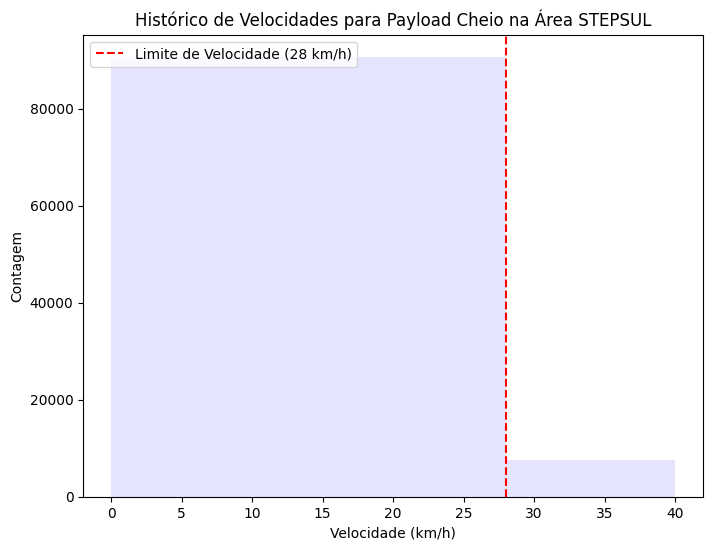

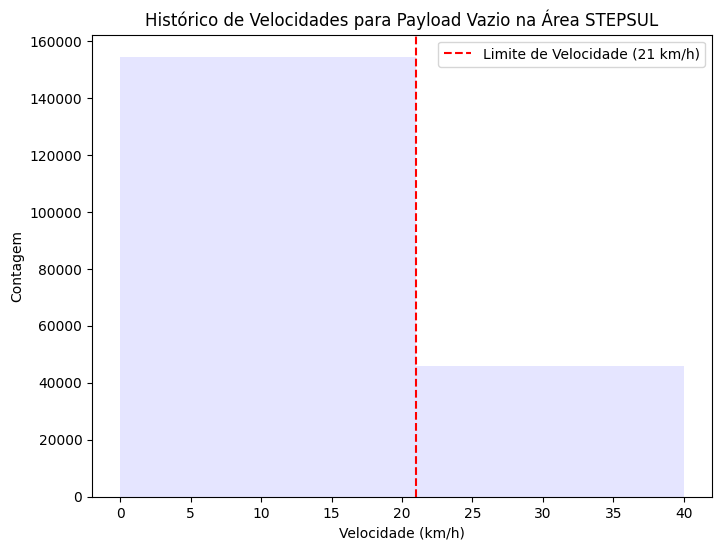

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.image import imread

# Lendo o arquivo de telemetria
arquivo_telemetria = '/content/drive/MyDrive/ANGLO - DADOS/2022-02e03_modificado_V3.csv'
dados = pd.read_csv(arquivo_telemetria)

# Removendo as colunas que não têm muita função no código
dados = dados.drop(['ShiftId', 'Data', 'Dia', 'Mês', 'Ano', 'Timestamp', 'StartEmpty', 'EndEmpty', 'EndFull', 'PositionX', 'Speed', 'Decimais', '7'], axis=1)

# Adiciona uma coluna com a velocidade arredondada para o múltiplo de 10 mais próximo
dados['Speed_km_h_10'] = np.floor(dados['Speed_km_h'] / 10) * 10

# Definindo os limites de cada área
limites_areas = [
    ('FASE4', 664870, 665214, 7908550, 7909640),
    ('BRITADOR', 664957, 665774, 7909655, 7911199),
    ('CASCALHEIRA', 665214, 666242, 7908957, 7909655),
    ('BOREL', 665728, 666741, 7906891, 7908957),
    ('PDE', 666252, 667494, 7908966, 7910662),
    ('STEPSUL', 665728, 668065, 7904231, 7906977)
]

# Criando o diretório para salvar as imagens
diretorio_imagens = '/content/drive/MyDrive/ANGLO - DADOS/imagens_plotadas'
os.makedirs(diretorio_imagens, exist_ok=True)

# Função para criar histograma de limites de velocidade
def criar_histograma_limites(df, payload, area):
    plt.figure(figsize=(8, 6))

    if payload == 'Cheio':
        max_speed = 28
    elif payload == 'Vazio':
        max_speed = 21

    velocidades = df['Speed_km_h']

    plt.hist(velocidades, bins=[0, max_speed, 40], color='b', alpha=0.5)
    plt.axvline(x=max_speed, color='r', linestyle='--', label=f'Limite de Velocidade ({max_speed} km/h)')

    plt.xlabel('Velocidade (km/h)')
    plt.ylabel('Contagem')
    plt.title(f'Histórico de Velocidades para Payload {payload} na Área {area}')
    plt.legend()

    # Salvar a imagem plotada
    file_name = f'{payload}_{area}_limites_histogram.png'
    file_path = os.path.join(diretorio_imagens, file_name)
    plt.savefig(file_path)

    plt.show()

# Loop sobre as áreas
for area, xmin, xmax, ymin, ymax in limites_areas:
    for payload_type in ['Cheio', 'Vazio']:
        df_area = dados[(dados['X'] >= xmin) & (dados['X'] <= xmax) & (dados['Y'] >= ymin) & (dados['Y'] <= ymax)]
        df_area_payload = df_area[df_area['Payload'] == payload_type]

        if not df_area_payload.empty:
            criar_histograma_limites(df_area_payload, payload_type, area)


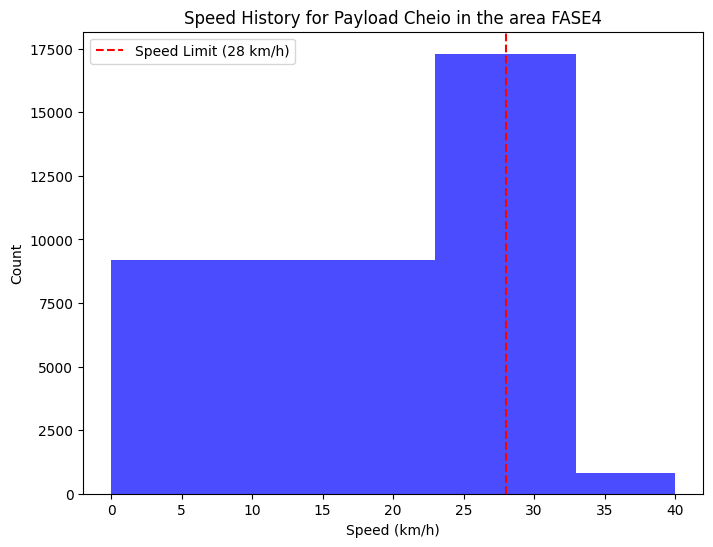

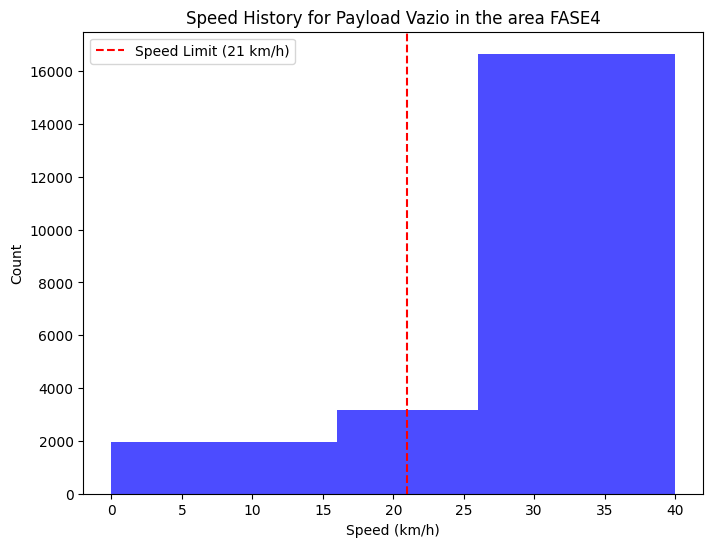

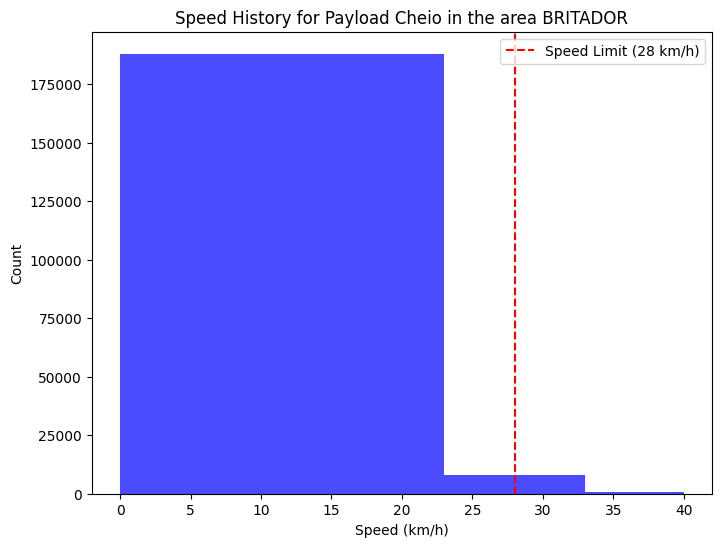

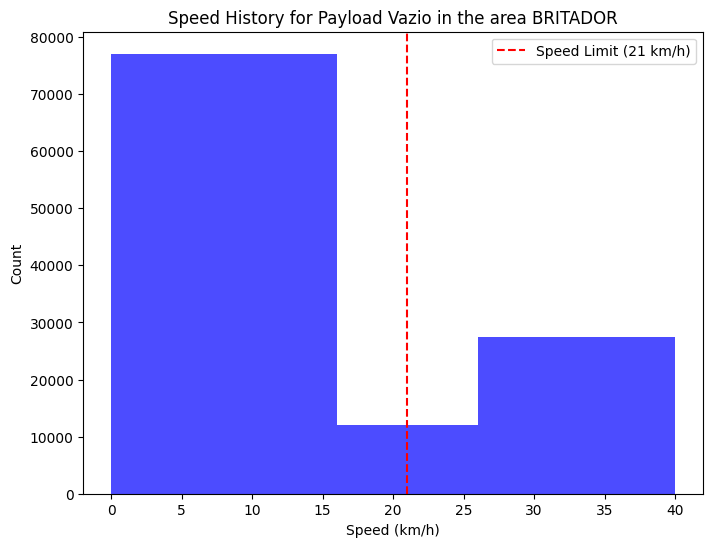

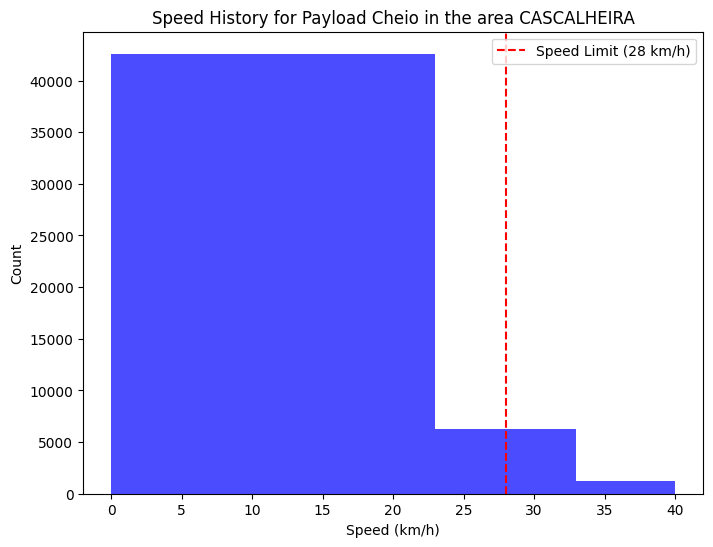

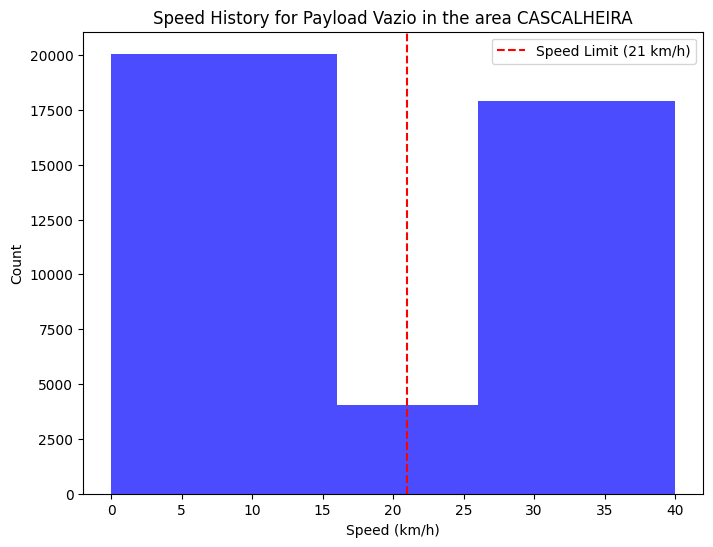

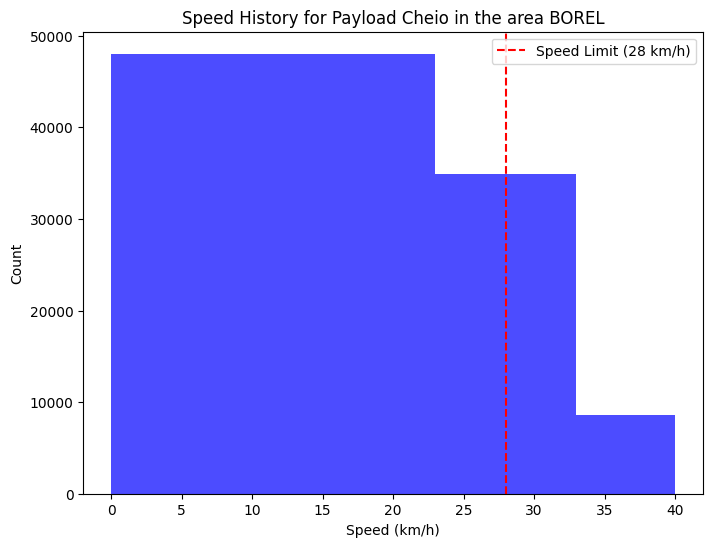

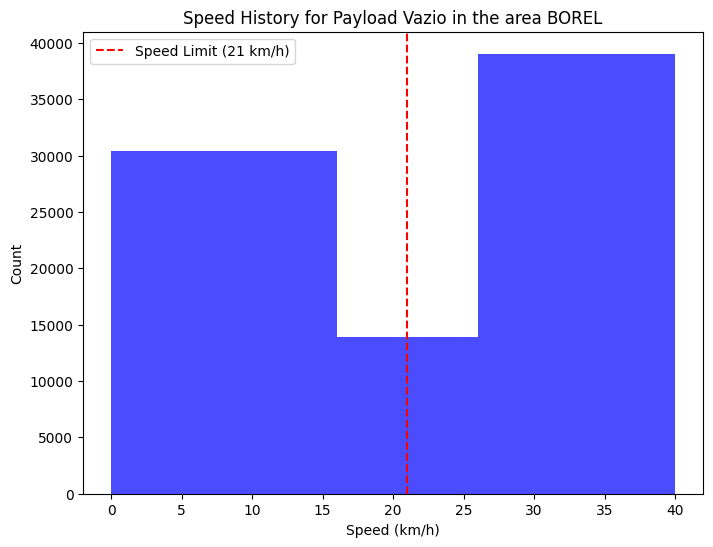

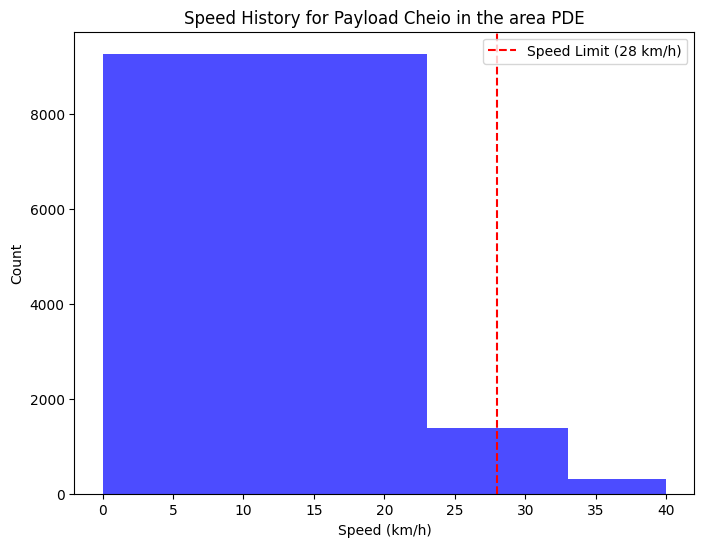

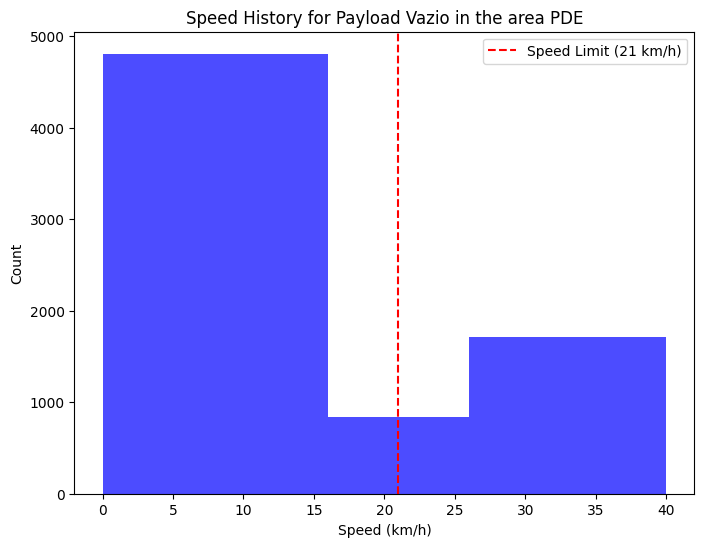

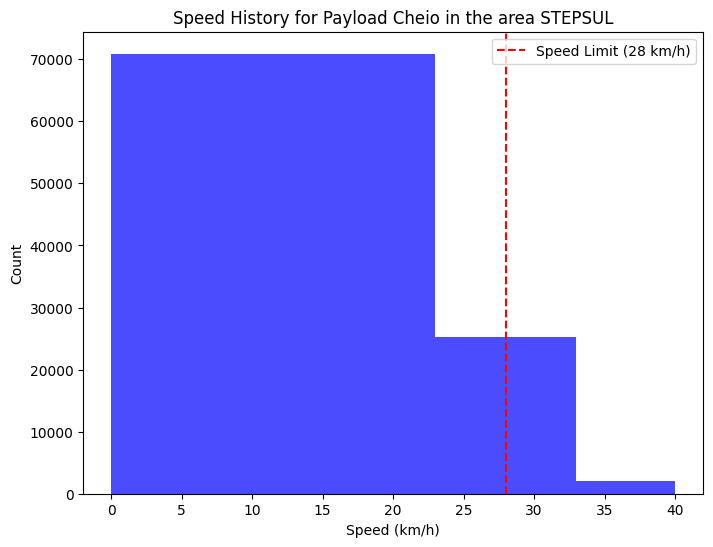

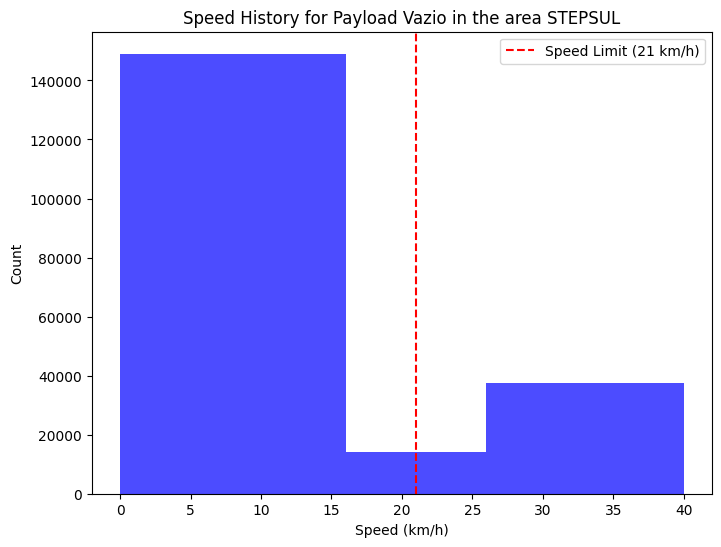

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.image import imread

# Lendo o arquivo de telemetria
arquivo_telemetria = '/content/drive/MyDrive/ANGLO - DADOS/2022-02e03_modificado_V3.csv'
dados = pd.read_csv(arquivo_telemetria)

# Removendo as colunas que não têm muita função no código
dados = dados.drop(['ShiftId', 'Data', 'Dia', 'Mês', 'Ano', 'Timestamp', 'StartEmpty', 'EndEmpty', 'EndFull', 'PositionX', 'Speed', 'Decimais', '7'], axis=1)

# Adiciona uma coluna com a velocidade arredondada para o múltiplo de 10 mais próximo
dados['Speed_km_h_10'] = np.floor(dados['Speed_km_h'] / 10) * 10

# Definindo os limites de cada área
limites_areas = [
    ('FASE4', 664870, 665214, 7908550, 7909640),
    ('BRITADOR', 664957, 665774, 7909655, 7911199),
    ('CASCALHEIRA', 665214, 666242, 7908957, 7909655),
    ('BOREL', 665728, 666741, 7906891, 7908957),
    ('PDE', 666252, 667494, 7908966, 7910662),
    ('STEPSUL', 665728, 668065, 7904231, 7906977)
]

# Criando o diretório para salvar as imagens
diretorio_imagens = '/content/drive/MyDrive/ANGLO - DADOS/imagens_plotadas'
os.makedirs(diretorio_imagens, exist_ok=True)

# Função para criar histograma de limites de velocidade
def criar_histograma_limites(df, payload, area):
    plt.figure(figsize=(8, 6))

    if payload == 'Cheio':
        max_speed = 28
    elif payload == 'Vazio':
        max_speed = 21

    velocidades = df['Speed_km_h']

    plt.hist(velocidades, bins=[0, max_speed - 5, max_speed + 5, 40], color='b', alpha=0.7)
    plt.axvline(x=max_speed, color='r', linestyle='--', label=f'Speed Limit ({max_speed} km/h)')

    plt.xlabel('Speed (km/h)')
    plt.ylabel('Count')
    plt.title(f'Speed History for Payload {payload} in the area {area}')
    plt.legend()

    # Salvar a imagem plotada
    file_name = f'{payload}_{area}_limites_histogram.png'
    file_path = os.path.join(diretorio_imagens, file_name)
    plt.savefig(file_path)

    plt.show()

# Loop sobre as áreas
for area, xmin, xmax, ymin, ymax in limites_areas:
    for payload_type in ['Cheio', 'Vazio']:
        df_area = dados[(dados['X'] >= xmin) & (dados['X'] <= xmax) & (dados['Y'] >= ymin) & (dados['Y'] <= ymax)]
        df_area_payload = df_area[df_area['Payload'] == payload_type]

        if not df_area_payload.empty:
            criar_histograma_limites(df_area_payload, payload_type, area)
